## **Importing necessary Python Packages**

### **Jupyter Dynamic Classes**

Python Package for defining a Python class across multiple cells

Documentation Link :- https://alexhagen.github.io/jdc/

In [ ]:
!pip install jdc

### **PyTorch**

A Machine Learning framework based on the Torch library.

Documentation Linl :- https://pytorch.org/docs/stable/index.html

In [ ]:
!pip install torch
!pip install torchvision

In [ ]:
from typing import Tuple
import math
import sys
import torch
import torchvision
import jdc
import os
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### **Tree Linux Command**

A recursive directory listing command that produces a depth-indented listing of files.

In [ ]:
!apt-get install tree

## **Lung Opacity-COVID Preprocessing**

### **Install COVID Dataset**

In [ ]:
!gdown 1xFC6d71hKdOQlvuE3IuQIRnHCKShLrkL
!unzip /content/COVID.zip
!rm -rf /content/__MACOSX

### **Install Lung Opacity Dataset**

In [ ]:
!gdown 1RNgbBPwtlE0Qzy8InJrinxJaMeJI0GWc
!unzip /content/Lung_Opacity.zip
!rm -rf /content/__MACOSX

In [ ]:
os.mkdir("/content/Dataset")
os.mkdir("/content/Dataset/Client-A")
os.mkdir("/content/Dataset/Client-B")
os.mkdir("/content/Dataset/Client-A/Training")
os.mkdir("/content/Dataset/Client-A/Training/Positive")
os.mkdir("/content/Dataset/Client-A/Validation")
os.mkdir("/content/Dataset/Client-A/Validation/Positive")
os.mkdir("/content/Dataset/Client-B/Training")
os.mkdir("/content/Dataset/Client-B/Training/Positive")
os.mkdir("/content/Dataset/Client-B/Training/Negative")

Enter per class number of images

In [ ]:
os.chdir("/content/Lung_Opacity")
print(len(os.listdir()))

4382


In [ ]:
# Take user input for the size of training set
# maximum_training_examples = len(os.listdir())
training_examples = int(input(f"Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.\nNote : The maximum number of training examples are {maximum_training_examples}. Please select a number smaller than the given upper limit.\n\n"))
finalA_training_size = training_examples

Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.
Note : The maximum number of training examples are 7. Please select a number smaller than the given upper limit.

10


In [ ]:
positive_class_path = os.path.join('/content/COVID')
os.chdir(positive_class_path)
# image_list = os.listdir()
# for image in image_list[:finalA_training_size]:
#     image_path = os.path.join(positive_class_path, image)
#     final_path = os.path.join('/content/Dataset/Client-A/Training/Positive', image)
#     shutil.move(image_path, final_path)

# validation_size = max(10, math.floor(0.1*finalA_training_size))
# for image in image_list[finalA_training_size:finalA_training_size+validation_size]:
#     image_path = os.path.join(positive_class_path, image)
#     final_path = os.path.join('/content/Dataset/Client-A/Validation/Positive', image)
#     shutil.move(image_path, final_path)

for image in image_list[-3416:]:
    image_path = os.path.join(positive_class_path, image)
    final_path = os.path.join('/content/Dataset/Client-B/Training/Positive', image)
    shutil.move(image_path, final_path)

In [ ]:
negative_class_path = os.path.join('/content/Lung_Opacity')
os.chdir(negative_class_path)
image_list = os.listdir()
for image in image_list[:-5812]:
    image_path = os.path.join(negative_class_path, image)
    final_path = os.path.join('/content/Dataset/Client-B/Training/Negative', image)
    shutil.move(image_path, final_path)

## **Installation of Medical Dataset**

### **Install the Pneumonia MNIST Dataset**

In [ ]:
!gdown 1RB_-3LGlQBOXepaT6248xB5KYl8swATP

Downloading...
From: https://drive.google.com/uc?id=1RB_-3LGlQBOXepaT6248xB5KYl8swATP
To: /content/PneumoniaMNIST.npz
100% 404M/404M [00:03<00:00, 112MB/s]


### **Install the Breast MNIST Dataset**

In [ ]:
!gdown 1GocwOTV2o4PxD1IiQI5y3Q5nG5gxX25M

### **Install the Aptos MNIST Dataset**

In [ ]:
!gdown 1BzlVo9lFZy49bHVOk8afk-6tox0j1Usq

Downloading...
From: https://drive.google.com/uc?id=1BzlVo9lFZy49bHVOk8afk-6tox0j1Usq
To: /content/aptos.npz
100% 551M/551M [00:05<00:00, 92.3MB/s]


### **Install the Derma MNIST Dataset**

In [ ]:
!gdown 15KSVvTkd7lpOsdGGbhd1Jy3SzFi4Gd-H

### **Install the OCT MNIST Dataset**

In [ ]:
!gdown 1LnHPQ1Rx7OKP4xWEtHxAQ89vdUtRnzfP

## **Preprocessing of Medical Dataset**

### **Create the necessary directory structure**

In [ ]:
os.mkdir("/content/Dataset")
os.mkdir("/content/Dataset/Client-A")
os.mkdir("/content/Dataset/Client-B")
os.mkdir("/content/Dataset/Client-A/Training")
os.mkdir("/content/Dataset/Client-A/Training/Positive")
os.mkdir("/content/Dataset/Client-A/Training/Negative")
os.mkdir("/content/Dataset/Client-A/Validation")
os.mkdir("/content/Dataset/Client-A/Validation/Positive")
os.mkdir("/content/Dataset/Client-A/Validation/Negative")
os.mkdir("/content/Dataset/Client-B/Training")
os.mkdir("/content/Dataset/Client-B/Training/Positive")
os.mkdir("/content/Dataset/Client-B/Training/Negative")
# os.mkdir("/content/Dataset/Client-B/Validation")
# os.mkdir("/content/Dataset/Client-B/Validation/Positive")
# os.mkdir("/content/Dataset/Client-B/Validation/Negative")

### **Enter the file name which contains the training dataset**

In [ ]:
file_name = input("Please enter the name of .npz file which contains the training dataset: ")

Please enter the name of .npz file which contains the training dataset: /content/PneumoniaMNIST.npz


### **Divide the entire dataset into Positive and Negative Classes**

In [ ]:
file = np.load(file_name)
train_images = file[file.files[0]]
train_labels = file[file.files[1]]

positive_images = [train_images[i] for i in range(len(train_labels)) if train_labels[i]==1]
negative_images = [train_images[i] for i in range(len(train_labels)) if train_labels[i]==0]
del train_images, train_labels

### **Bring the range of NumPy array to 0 to 255**

In [ ]:
# Condition 1 : The data type of NumPy Array is float
# Condition 2 : The NumPy Array is normalized to range (0,1)
if positive_images[0].dtype == 'float32' and np.max(positive_images[0])<=1.0:
  for i in range(len(positive_images)):
    positive_images[i] = positive_images[i]*255               # Bring the NumPy Array range to (0,255)
    positive_images[i] = positive_images[i].astype(np.uint8)  # Cast the NumPy Array to Unsigned Int
  for i in range(len(negative_images)):
    negative_images[i] = negative_images[i]*255               # Bring the NumPy Array range to (0,255)
    negative_images[i] = negative_images[i].astype(np.uint8)  # Cast the NumPy Array to Unsigned Int

### **Setting Training Dataset Size for Client A**

In [ ]:
# Take user input for the size of training set
maximum_training_examples = len(positive_images) + len(negative_images)
training_examples = int(input(f"Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.\nNote : The maximum number of training examples are {maximum_training_examples}. Please select a number smaller than the given upper limit.\n\n"))
finalA_training_size = min(maximum_training_examples, training_examples)

# Size of Validation Dataset = 0.1 * Size of Training Dataset
finalA_validation_size = max(10, math.floor(0.1*finalA_training_size/2))

Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.
Note : The maximum number of training examples are 2682. Please select a number smaller than the given upper limit.

360


### **Setting Test Dataset Size for Client B**

In [ ]:
# Take user input for the size of training set
maximum_test_examples = len(positive_images) + len(negative_images) - finalA_training_size - 10
test_examples = int(input(f"Enter number of testing examples that you want to use for testing the Variational Autoencoder at Client B.\nNote : The maximum number of testing examples are {maximum_test_examples}. Please select a number smaller than the given upper limit.\n\n"))
finalB_test_size = min(maximum_test_examples, test_examples)

Enter number of testing examples that you want to use for testing the Variational Autoencoder at Client B.
Note : The maximum number of testing examples are 2312. Please select a number smaller than the given upper limit.

360


### **Divide the dataset into Training, Validation and Test Dataset**

In [ ]:
ClientA_training_positive_images = positive_images[:math.floor(finalA_training_size/2)]
ClientA_training_negative_images = negative_images[:math.floor(finalA_training_size/2)]

ClientA_validation_positive_images = positive_images[math.floor(finalA_training_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)]
ClientA_validation_negative_images = negative_images[math.floor(finalA_training_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)]

ClientB_training_positive_images = positive_images[math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)+math.floor(finalB_test_size/2)]
ClientB_training_negative_images = negative_images[math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)+math.floor(finalB_test_size/2)]
# ClientB_training_positive_images = positive_images[math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)+1657]
# ClientB_training_negative_images = negative_images[math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2):math.floor(finalA_training_size/2)+math.floor(finalA_validation_size/2)+1605]

### **Convert the NumPy Arrays into images**

In [ ]:
from PIL import Image

os.chdir("/content/Dataset/Client-A/Training/Positive")
for i in range(len(ClientA_training_positive_images)):
  data = Image.fromarray(ClientA_training_positive_images[i])
  data.save(f'{i}.png')

os.chdir("/content/Dataset/Client-A/Training/Negative")
for i in range(len(ClientA_training_negative_images)):
  data = Image.fromarray(ClientA_training_negative_images[i])
  data.save(f'{i}.png')

os.chdir("/content/Dataset/Client-A/Validation/Positive")
for i in range(len(ClientA_validation_positive_images)):
  data = Image.fromarray(ClientA_validation_positive_images[i])
  data.save(f'{i}.png')

os.chdir("/content/Dataset/Client-A/Validation/Negative")
for i in range(len(ClientA_validation_negative_images)):
  data = Image.fromarray(ClientA_validation_negative_images[i])
  data.save(f'{i}.png')

os.chdir("/content/Dataset/Client-B/Training/Positive")
for i in range(len(ClientB_training_positive_images)):
  data = Image.fromarray(ClientB_training_positive_images[i])
  data.save(f'{i}.png')

os.chdir("/content/Dataset/Client-B/Training/Negative")
for i in range(len(ClientB_training_negative_images)):
  data = Image.fromarray(ClientB_training_negative_images[i])
  data.save(f'{i}.png')

# os.chdir("/content/Dataset/Client-B/Validation/Positive")
# for i in range(len(ClientB_validation_positive_images)):
#   data = Image.fromarray(ClientB_validation_positive_images[i])
#   data.save(f'{i}.png')

# os.chdir("/content/Dataset/Client-B/Validation/Negative")
# for i in range(len(ClientB_validation_negative_images)):
#   data = Image.fromarray(ClientB_validation_negative_images[i])
#   data.save(f'{i}.png')

## **MNIST Dataset Preprocessing**

### **Install MNIST Dataset**

In [ ]:
!git clone https://github.com/Adu3108/MNIST-Dataset.git

Cloning into 'MNIST-Dataset'...
remote: Enumerating objects: 70024, done.
remote: Counting objects: 100% (70024/70024), done.
remote: Compressing objects: 100% (11717/11717), done.
remote: Total 70024 (delta 58307), reused 70024 (delta 58307), pack-reused 0
Receiving objects: 100% (70024/70024), 22.29 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (58307/58307), done.
Updating files: 100% (70000/70000), done.


### **Creating Necessary Directories**



In [ ]:
os.mkdir("/content/MNIST-Dataset/Client-A")
os.mkdir("/content/MNIST-Dataset/Client-B")
os.mkdir("/content/MNIST-Dataset/Client-A/Training")
os.mkdir("/content/MNIST-Dataset/Client-A/Training/Positive")
os.mkdir("/content/MNIST-Dataset/Client-A/Training/Negative")
os.mkdir("/content/MNIST-Dataset/Client-A/Validation")
os.mkdir("/content/MNIST-Dataset/Client-A/Validation/Dataset")
os.mkdir("/content/MNIST-Dataset/Client-B/Training")
os.mkdir("/content/MNIST-Dataset/Client-B/Training/Positive")
os.mkdir("/content/MNIST-Dataset/Client-B/Training/Negative")
os.mkdir("/content/MNIST-Dataset/Client-B/Validation")
os.mkdir("/content/MNIST-Dataset/Client-B/Validation/Dataset")

### **Setting Training Dataset Size for Client A**

In [ ]:
os.chdir('/content/MNIST-Dataset/Training/0')

# Take user input for the size of training set
maximum_training_examples = len(os.listdir())
training_examples = int(input(f"Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.\nNote : The maximum number of training examples are {maximum_training_examples}. Please select a number smaller than the given upper limit.\n\n"))
finalA_training_size = min(maximum_training_examples, training_examples)

Enter number of training examples that you want to use for training the Variational Autoencoder at Client A.
Note : The maximum number of training examples are 5923. Please select a number smaller than the given upper limit.

1500


### **Setting Training Dataset Size for Client B**

In [ ]:
os.chdir('/content/MNIST-Dataset/Testing')

# Get the maximum number of training examples available at Client B
maximum_training_examples = 0
class_list = os.listdir()
for class_name in class_list:
  class_path = os.path.join('/content/MNIST-Dataset/Testing', class_name)
  os.chdir(class_path)
  maximum_training_examples += len(os.listdir())

# Take user input for the size of training set
training_examples = int(input(f"Enter number of training examples that you want to use for training the Variational Autoencoder at Client B.\nNote : The maximum number of training examples are {maximum_training_examples}. Please select a number smaller than the given upper limit.\n\n"))
finalB_training_size = min(maximum_training_examples, training_examples)

Enter number of training examples that you want to use for training the Variational Autoencoder at Client B.
Note : The maximum number of training examples are 10000. Please select a number smaller than the given upper limit.

1000


### **Setup 1 : Training Dataset at Client A consists of only images belonging to Positive Class**

#### **Client-A**

##### **Removing All classes other than the class of interest**

In [ ]:
os.chdir('/content/MNIST-Dataset/Training')
class_list = os.listdir()
class_list.sort()
positive_class = class_list[0]
for class_name in class_list[1:]:
  path = os.path.join('/content/MNIST-Dataset/Training', class_name)
  shutil.rmtree(path)

##### **Moving training examples to the appropriate directory**

In [ ]:
positive_class_path = os.path.join('/content/MNIST-Dataset/Training', positive_class)
os.chdir(positive_class_path)
image_list = os.listdir()
for image in image_list[:finalA_training_size]:
    image_path = os.path.join(positive_class_path, image)
    final_path = os.path.join('/content/MNIST-Dataset/Client-A/Training/Positive', image)
    shutil.move(image_path, final_path)

##### **Moving Validation examples to the appropriate directory**

In [ ]:
validation_size = math.ceil(finalA_training_size*0.1)
for image in image_list[finalA_training_size:finalA_training_size+validation_size]:
    image_path = os.path.join(positive_class_path, image)
    final_path = os.path.join('/content/MNIST-Dataset/Client-A/Validation/Dataset', image)
    shutil.move(image_path, final_path)

##### **Deleting the original Training Directory**

In [ ]:
shutil.rmtree("/content/MNIST-Dataset/Training")

##### **Printing the statistics of Dataset that will be used for training VAE at Client-A**

In [ ]:
os.chdir("/content/MNIST-Dataset/Client-A/Training/Positve")
print(f"\nNumber of training examples used for training the Variational Autoencoder at Client A = {len(os.listdir())}")
os.chdir('/content/MNIST-Dataset/Client-A/Validation/Dataset')
print(f"\nNumber of validation examples used for training the Variational Autoencoder at Client A = {len(os.listdir())}")
os.chdir("/content")

#### **Client-B**

##### **Calculating the size of Training Set and Validation Set**

In [ ]:
os.chdir('/content/MNIST-Dataset/Testing')
class_list = os.listdir()
class_list.sort()
positive_class_path = os.path.join('/content/MNIST-Dataset/Testing', class_list[0]) # The directory where all the test examples will finally reside

average_training_class_size = int(finalB_training_size/len(class_list)) # Average number of images from each class that will be included in the training set of Client B
remaining_training_image_size = finalB_training_size - average_training_class_size*len(class_list) # These remaining training images will be taken from the positive class

validationB_size = math.ceil(finalB_training_size*0.1) # Size of the Validation Dataset
average_validation_class_size = math.floor(validationB_size/len(class_list)) # Average number of images from each class that will be included in the validation set of Client B
remaining_validation_image_size = validationB_size - average_validation_class_size*len(class_list) # These remaining validation images will be taken from the positive class

##### **Moving training images from the positive class to the appropriate directories**

In [ ]:
os.chdir(positive_class_path)
image_list = os.listdir()
# Move a subset of test examples from the positive class to the training folder
for training_image in image_list[:average_training_class_size+remaining_training_image_size]:
  image_path = os.path.join(positive_class_path, training_image)
  final_path = os.path.join("/content/MNIST-Dataset/Client-B/Training/Positive", training_image)
  shutil.move(image_path, final_path)

# Move a subset of test examples from the positive class to the validation folder
for validation_image in image_list[average_training_class_size+remaining_training_image_size:average_training_class_size+remaining_training_image_size+average_validation_class_size+remaining_validation_image_size]:
  image_path = os.path.join(positive_class_path, validation_image)
  final_path = os.path.join("/content/MNIST-Dataset/Client-B/Validation/Dataset", validation_image)
  shutil.move(image_path, final_path)

# Remove the excess images from the positive class
for extra_image in image_list[average_validation_class_size+remaining_validation_image_size+average_training_class_size+remaining_training_image_size:]:
  os.remove(extra_image)

# Delete the directory associated with the positive class
os.rmdir(positive_class_path)

##### **Moving training images from other classes to the appropriate directories**

In [ ]:
for class_name in class_list[1:]:
  class_path = os.path.join('/content/MNIST-Dataset/Testing', class_name)
  os.chdir(class_path)

  # Move a subset of test examples in other classes to the validation folder
  image_list = os.listdir()
  for validation_image in image_list[:average_validation_class_size]:
    image_path = os.path.join(class_path, validation_image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-B/Validation/Dataset", validation_image)
    shutil.move(image_path, final_path)

  # Move a subset of test examples in other classes to the training folder
  for image in image_list[average_validation_class_size:average_validation_class_size+average_training_class_size]:
    image_path = os.path.join(class_path, image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-B/Training/Negative", image)
    shutil.move(image_path, final_path)

  # Remove the excess images from the other classes
  for extra_image in image_list[average_validation_class_size+average_training_class_size:]:
    os.remove(extra_image)

  # Remove the empty folder associated with the current class
  os.rmdir(class_path)

##### **Deleting the original Testing Directory**

In [ ]:
shutil.rmtree("/content/MNIST-Dataset/Testing")

##### **Printing the statistics of Dataset that will be used at Client-B**

In [ ]:
training_examples = 0
os.chdir("/content/MNIST-Dataset/Client-B/Training/Positive")
training_examples += len(os.listdir())
os.chdir("/content/MNIST-Dataset/Client-B/Training/Negative")
training_examples += len(os.listdir())
print(f"\nNumber of test examples used at Client B = {training_examples}")
os.chdir('/content/MNIST-Dataset/Client-B/Validation/Dataset')
print(f"\nNumber of validation examples used at Client B = {len(os.listdir())}")
os.chdir("/content")

### **Setup 2 : Training Dataset at Client A consists of images belonging to  Positive and Negative class**

#### **Client-A**

##### **Moving training images from the positive class to the appropriate directories**

In [ ]:
os.chdir('/content/MNIST-Dataset/Training')
class_list = os.listdir()
class_list.sort()
positive_class = class_list[0]

positive_class_path = os.path.join('/content/MNIST-Dataset/Training', positive_class)
os.chdir(positive_class_path)
image_list = os.listdir()

# Move a subset of training examples from the positive classes to the Training folder
for image in image_list[:finalA_training_size]:
    image_path = os.path.join(positive_class_path, image)
    final_path = os.path.join('/content/MNIST-Dataset/Client-A/Training/Positive', image)
    shutil.move(image_path, final_path)

# Move a subset of training examples from the positive classes to the Validation folder
validation_size = math.ceil(finalA_training_size*0.1)
for image in image_list[finalA_training_size:finalA_training_size+validation_size]:
    image_path = os.path.join(positive_class_path, image)
    final_path = os.path.join('/content/MNIST-Dataset/Client-A/Validation/Dataset', image)
    shutil.move(image_path, final_path)

# Remove the remaining training examples from the positive classes
for extra_image in image_list[validation_size+finalA_training_size:]:
    os.remove(extra_image)

# Delete the directory associated with the positive class
os.rmdir(positive_class_path)

##### **Moving training images from other classes to the appropriate directories**

In [ ]:
os.chdir("/content/MNIST-Dataset/Training")
class_list = os.listdir()
average_negative_class_training_size = math.ceil(finalA_training_size/(len(class_list)-1))
average_negative_class_validation_size = math.ceil(validation_size/(len(class_list)-1))

for class_name in class_list[1:]:
  class_path = os.path.join('/content/MNIST-Dataset/Training', class_name)
  os.chdir(class_path)

  # Move a subset of training examples in other classes to the validation folder
  image_list = os.listdir()
  for validation_image in image_list[:average_negative_class_validation_size]:
    image_path = os.path.join(class_path, validation_image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-A/Validation/Dataset", validation_image)
    shutil.move(image_path, final_path)

  # Move a subset of test examples in other classes to the training folder
  for image in image_list[average_negative_class_validation_size:average_negative_class_validation_size+average_negative_class_training_size]:
    image_path = os.path.join(class_path, image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-A/Training/Negative", image)
    shutil.move(image_path, final_path)

  # Remove the excess images from the other classes
  for extra_image in image_list[average_negative_class_validation_size+average_negative_class_training_size:]:
    os.remove(extra_image)

  # Remove the empty folder associated with the current class
  os.rmdir(class_path)

##### **Deleting the original Training Directory**

In [ ]:
shutil.rmtree("/content/MNIST-Dataset/Training")

##### **Printing the statistics of Dataset that will be used for training VAE at Client-A**

In [ ]:
training_examples = 0
os.chdir("/content/MNIST-Dataset/Client-A/Training/Positive")
training_examples += len(os.listdir())
os.chdir("/content/MNIST-Dataset/Client-A/Training/Negative")
training_examples += len(os.listdir())
print(f"\nNumber of training examples used for training the Variational Autoencoder at Client A = {training_examples}")
os.chdir('/content/MNIST-Dataset/Client-A/Validation/Dataset')
print(f"\nNumber of validation examples used for training the Variational Autoencoder at Client A = {len(os.listdir())}")
os.chdir("/content")


Number of training examples used for training the Variational Autoencoder at Client A = 3004

Number of validation examples used for training the Variational Autoencoder at Client A = 302


#### **Client-B**

##### **Calculating the size of Training Set and Validation Set**

In [ ]:
os.chdir('/content/MNIST-Dataset/Testing')
class_list = os.listdir()
class_list.sort()
positive_class_path = os.path.join('/content/MNIST-Dataset/Testing', class_list[0]) # The directory where all the test examples will finally reside

average_training_class_size = int(finalB_training_size/len(class_list)) # Average number of images from each class that will be included in the training set of Client B
remaining_training_image_size = finalB_training_size - average_training_class_size*len(class_list) # These remaining training images will be taken from the positive class

validationB_size = math.ceil(finalB_training_size*0.1) # Size of the Validation Dataset
average_validation_class_size = math.floor(validationB_size/len(class_list)) # Average number of images from each class that will be included in the validation set of Client B
remaining_validation_image_size = validationB_size - average_validation_class_size*len(class_list) # These remaining validation images will be taken from the positive class

##### **Moving training images from the positive class to the appropriate directories**

In [ ]:
os.chdir(positive_class_path)
image_list = os.listdir()
# Move a subset of test examples from the positive class to the training folder
for training_image in image_list[:average_training_class_size+remaining_training_image_size]:
  image_path = os.path.join(positive_class_path, training_image)
  final_path = os.path.join("/content/MNIST-Dataset/Client-B/Training/Positive", training_image)
  shutil.move(image_path, final_path)

# Move a subset of test examples from the positive class to the validation folder
for validation_image in image_list[average_training_class_size+remaining_training_image_size:average_training_class_size+remaining_training_image_size+average_validation_class_size+remaining_validation_image_size]:
  image_path = os.path.join(positive_class_path, validation_image)
  final_path = os.path.join("/content/MNIST-Dataset/Client-B/Validation/Dataset", validation_image)
  shutil.move(image_path, final_path)

# Remove the excess images from the positive class
for extra_image in image_list[average_validation_class_size+remaining_validation_image_size+average_training_class_size+remaining_training_image_size:]:
  os.remove(extra_image)

##### **Moving training images from other classes to the appropriate directories**

In [ ]:
for class_name in class_list[1:]:
  class_path = os.path.join('/content/MNIST-Dataset/Testing', class_name)
  os.chdir(class_path)

  # Move a subset of test examples in other classes to the validation folder
  image_list = os.listdir()
  for validation_image in image_list[:average_validation_class_size]:
    image_path = os.path.join(class_path, validation_image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-B/Validation/Dataset", validation_image)
    shutil.move(image_path, final_path)

  # Move a subset of test examples in other classes to the training folder
  for image in image_list[average_validation_class_size:average_validation_class_size+average_training_class_size]:
    image_path = os.path.join(class_path, image)
    final_path = os.path.join("/content/MNIST-Dataset/Client-B/Training/Negative", image)
    shutil.move(image_path, final_path)

  # Remove the excess images from the other classes
  for extra_image in image_list[average_validation_class_size+average_training_class_size:]:
    os.remove(extra_image)

  # Remove the empty folder associated with the current class
  os.rmdir(class_path)

##### **Deleting the original Testing Directory**

In [ ]:
shutil.rmtree("/content/MNIST-Dataset/Testing")

##### **Printing the statistics of Dataset that will be used for training VAE at Client-B**

In [ ]:
training_examples = 0
os.chdir("/content/MNIST-Dataset/Client-B/Training/Positive")
training_examples += len(os.listdir())
os.chdir("/content/MNIST-Dataset/Client-B/Training/Negative")
training_examples += len(os.listdir())
print(f"\nNumber of test examples used at Client B = {training_examples}")
os.chdir('/content/MNIST-Dataset/Client-B/Validation/Dataset')
print(f"\nNumber of validation examples used at Client B = {len(os.listdir())}")
os.chdir("/content")


Number of test examples used at Client B = 1000

Number of validation examples used at Client B = 100


### **Final Directory Structure**

In [ ]:
!tree -d /content/MNIST-Dataset

## **Class-Based VAE**
This class includes both the encoder and decoder portions of the model.

    Args:
        n_latent - number of latent dimensions
        alpha - Controls the weightage of Reconstruction Loss in the total loss function of the VAE
        beta - Controls the weightage of Repulsion Loss in the total loss function of the VAE
        rho - Controls the distance between the clusters belonging to positive and negative classes in the latent space
        n_chan - number of channels in the input image
        input_d - height x width tuple of input image size in pixels
        batch - Batch size for training (Default = 1)

In [ ]:
class ClassBasedVae(torch.nn.Module):
    def __init__(self,
                 n_latent: int,
                 alpha: float,
                 beta: float,
                 gamma: float,
                 rho: float,
                 n_chan: int,
                 input_d: Tuple[int],
                 batch: int = 1) -> None:
        super(ClassBasedVae, self).__init__()
        # Initializing the class variables
        self.n_latent = n_latent
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.rho = rho
        self.n_chan = n_chan
        self.input_d = input_d
        self.batch = batch

        # Calculating the size of intermediate output of convolutional layers
        self.y_2, self.x_2 = self.get_layer_size(2)
        self.y_3, self.x_3 = self.get_layer_size(3)
        self.y_4, self.x_4 = self.get_layer_size(4)
        self.y_5, self.x_5 = self.get_layer_size(5)
        self.hidden_units = self.y_5 * self.x_5 * 16 # Number of neurons after convolution layers (height x width x n_chan)

        # Early Stopping
        self.patience = 10
        self.delta = 1e-4
        self.best_score = None
        self.num_bad_epochs = 0

        # Convolutional Encoder network
        self.enc_conv1 = torch.nn.Conv2d(
            in_channels=self.n_chan,
            out_channels=128,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv1_bn = torch.nn.BatchNorm2d(128)
        self.enc_conv1_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv1_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv2 = torch.nn.Conv2d(
            in_channels=128,
            out_channels=64,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv2_bn = torch.nn.BatchNorm2d(64)
        self.enc_conv2_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv2_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv3 = torch.nn.Conv2d(
            in_channels=64,
            out_channels=32,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv3_bn = torch.nn.BatchNorm2d(32)
        self.enc_conv3_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv3_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv4 = torch.nn.Conv2d(
            in_channels=32,
            out_channels=16,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv4_bn = torch.nn.BatchNorm2d(16)
        self.enc_conv4_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv4_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        # Dense Encoder Bottleneck
        self.enc_dense1 = torch.nn.Linear(self.hidden_units, 2048)
        self.enc_dense1_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense2 = torch.nn.Linear(2048, 1000)
        self.enc_dense2_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense3 = torch.nn.Linear(1000, 250)
        self.enc_dense3_af = torch.nn.LeakyReLU(0.1)

        # Latent Variables Calculation
        self.enc_dense4_mu_positive = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_mu_positive_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_mu_negative = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_mu_negative_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_var_positive = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_var_positive_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_var_negative = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_var_negative_af = torch.nn.LeakyReLU(0.1)

        # Dense Decoder Bottleneck
        self.dec_dense4 = torch.nn.Linear(self.n_latent, 250)
        self.dec_dense4_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense3 = torch.nn.Linear(250, 1000)
        self.dec_dense3_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense2 = torch.nn.Linear(1000, 2048)
        self.dec_dense2_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense1 = torch.nn.Linear(2048, self.hidden_units)
        self.dec_dense1_af = torch.nn.LeakyReLU(0.1)

        # Convolutional Decoder Network
        self.dec_conv4_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv4 = torch.nn.ConvTranspose2d(
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv4_bn = torch.nn.BatchNorm2d(32)
        self.dec_conv4_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv3_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv3 = torch.nn.ConvTranspose2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv3_bn = torch.nn.BatchNorm2d(64)
        self.dec_conv3_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv2_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv2 = torch.nn.ConvTranspose2d(
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv2_bn = torch.nn.BatchNorm2d(128)
        self.dec_conv2_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv1_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv1 = torch.nn.ConvTranspose2d(
            in_channels=128,
            out_channels=self.n_chan,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv1_bn = torch.nn.BatchNorm2d(self.n_chan)
        self.dec_conv1_af = torch.nn.Sigmoid()

### **Encode tensor X to its latent representation**

    Args:
        x - batch x channels x height x width tensor.


---

    Returns:
        (mu, var) where mu is sample mean and var is log variance in latent space.

In [ ]:
%%add_to ClassBasedVae
def encode(self, x: torch.Tensor) -> torch.Tensor:
    # Convolutional Encoder Network
    z = x
    z = self.enc_conv1(z)
    z = self.enc_conv1_bn(z)
    z = self.enc_conv1_af(z)
    z, self.indices1 = self.enc_conv1_pool(z)

    z = self.enc_conv2(z)
    z = self.enc_conv2_bn(z)
    z = self.enc_conv2_af(z)
    z, self.indices2 = self.enc_conv2_pool(z)

    z = self.enc_conv3(z)
    z = self.enc_conv3_bn(z)
    z = self.enc_conv3_af(z)
    z, self.indices3 = self.enc_conv3_pool(z)

    z = self.enc_conv4(z)
    z = self.enc_conv4_bn(z)
    z = self.enc_conv4_af(z)
    z, self.indices4 = self.enc_conv4_pool(z)

    # Dense Encoder Bottleneck
    z = z.view(z.size(0), -1) # Converting a 4D tensor (output of convolutional layer) to 1D tensor
    z = self.enc_dense1(z)
    z = self.enc_dense1_af(z)

    z = self.enc_dense2(z)
    z = self.enc_dense2_af(z)

    z = self.enc_dense3(z)
    z = self.enc_dense3_af(z)

    return z

In [ ]:
%%add_to ClassBasedVae
def positive_latent_calc(self, z: torch.Tensor) -> Tuple[torch.Tensor]:
    mu = self.enc_dense4_mu_positive(z)
    mu = self.enc_dense4_mu_positive_af(mu)

    var = self.enc_dense4_var_positive(z)
    var = self.enc_dense4_var_positive_af(var)

    return mu, var

In [ ]:
%%add_to ClassBasedVae
def negative_latent_calc(self, z: torch.Tensor) -> Tuple[torch.Tensor]:
    mu = self.enc_dense4_mu_negative(z)
    mu = self.enc_dense4_mu_negative_af(mu)

    var = self.enc_dense4_var_negative(z)
    var = self.enc_dense4_var_negative_af(var)

    return mu, var

### **Decode a latent representation to generate a reconstructed image**

    Args:
        z - 1 x n_latent input tensor.


---


    Returns:
        A batch x channels x height x width tensor representing the reconstructed image.

In [ ]:
%%add_to ClassBasedVae
def decode(self, z: torch.Tensor) -> torch.Tensor:
    # Dense Decoder Bottleneck
    y = self.dec_dense4(z)
    y = self.dec_dense4_af(y)

    y = self.dec_dense3(y)
    y = self.dec_dense3_af(y)

    y = self.dec_dense2(y)
    y = self.dec_dense2_af(y)

    y = self.dec_dense1(y)
    y = self.dec_dense1_af(y)

    # Convolutional Decoder Network
    y = torch.reshape(y, [self.batch, 16, self.y_5, self.x_5]) # Converting the 1D tensor (output of dense layers) to a 4D tensor
    y = self.dec_conv4_pool(
        y,
        self.indices4,
        output_size=torch.Size([self.batch, 16, self.y_4, self.x_4]))
    y = self.dec_conv4(y)
    y = self.dec_conv4_bn(y)
    y = self.dec_conv4_af(y)

    y = self.dec_conv3_pool(
        y,
        self.indices3,
        output_size=torch.Size([self.batch, 32, self.y_3, self.x_3]))
    y = self.dec_conv3(y)
    y = self.dec_conv3_bn(y)
    y = self.dec_conv3_af(y)

    y = self.dec_conv2_pool(
        y,
        self.indices2,
        output_size=torch.Size([self.batch, 64, self.y_2, self.x_2]))
    y = self.dec_conv2(y)
    y = self.dec_conv2_bn(y)
    y = self.dec_conv2_af(y)

    y = self.dec_conv1_pool(
        y,
        self.indices1,
        output_size=torch.Size([self.batch, 128, self.input_d[0], self.input_d[1]]))
    y = self.dec_conv1(y)
    y = self.dec_conv1_bn(y)
    y = self.dec_conv1_af(y)

    return y

### **Given a network with some input size, calculate the dimensions of the resulting layers**

    Args:
        layer - Layer Number
          For the encoder: 1 -> 2 -> 3 -> 4
          For the decoder: 4 -> 3 -> 2 -> 1
---
    Returns:
        (y, x) where y is the layer height in pixels and x is the layer width in pixels.

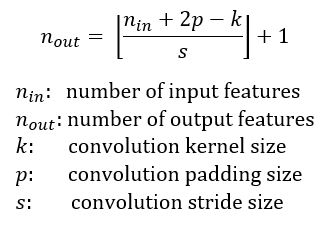




In [ ]:
%%add_to ClassBasedVae
def get_layer_size(self, layer: int) -> Tuple[int]:
    y_l, x_l = self.input_d
    for i in range(layer - 1):
        y_l = math.ceil((y_l - 2) / 2 + 1)
        x_l = math.ceil((x_l - 2) / 2 + 1)
    return y_l, x_l

### **Make an inference with the network**

    Args:
        x - input image (batch x channels x height x width).


---


    Returns:
        (out, mu, logvar) where:
            out - reconstructed image (batch x channels x height x width).
            mu - mean of sample in latent space.
            logvar - log variance of sample in latent space.

In [ ]:
%%add_to ClassBasedVae
def forward(self, x: torch.Tensor, class_name: int) -> Tuple[torch.Tensor]:
    z = self.encode(x)

    if class_name==0:
      mu, logvar = self.negative_latent_calc(z)
    else:
      mu, logvar = self.positive_latent_calc(z)

    std = torch.exp(logvar / 2)
    eps = torch.randn_like(std)
    z = mu + std * eps

    out = self.decode(z)
    return out, mu, logvar

### **Passing test examples through the entire VAE Network**

    Args:
        data_path - Path to the directory that stores the test images
        weight_file - Path to the .pt file that stores the weights of the VAE Network
---
    Returns:
      (final_input, final_mean, final_var, final_output) where:
        final_input - List of input image
        final_mean - List of mean of latent distribution for each input image
        final_var - List of variance of latent distribution for each input image
        final_output - List of reconstructed images


In [ ]:
%%add_to ClassBasedVae
def testing(self,
            data_path: str,
            weight_file: str):
    # Using cuda if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print (f'Using device: {device}')
    network = self.to(device)
    network.load_state_dict(torch.load(weight_file)) # Load weights from the .pt file
    network.eval() # Set the network in evalution mode

    # Defining Image Transformations
    # 1. Convert the input image to a PyTorch Tensor
    # 2. Resizing the image to (batch x channels x height x width)
    # (Optional) 3. Incase of only one input channel, we convert the input image to a GrayScale Image
    if self.n_chan == 1:
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize(self.input_d),
            torchvision.transforms.Grayscale()])
    else:
      transforms = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize(self.input_d)])

    # Applying image transformations to the input test dataset
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms)

    # Set up a Python iterable over the input test dataset
    test_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    final_input = []
    final_class = []
    final_output = []
    final_positive_mean = []
    final_negative_mean = []
    final_positive_var = []
    final_negative_var = []
    for data in test_loader:
        input, class_name = data
        final_input.append(input)
        final_class.append(int(class_name))
        input = input.to(device)
        with torch.no_grad():
          output, current_mean, current_logvariance = network.forward(input, int(class_name))
          other_output, other_mean, other_logvariance = network.forward(input, abs(int(class_name)-1))
          final_positive_mean.append(current_mean)
          final_positive_var.append(torch.exp(current_logvariance/2))
          final_negative_mean.append(other_mean)
          final_negative_var.append(torch.exp(other_logvariance/2))
          final_output.append(output)
    return (final_input, final_class, final_positive_mean, final_positive_var, final_negative_mean, final_negative_var, final_output)

### **Early Stopping Module**

Checks whether the current model has the best validation accuracy and decides to stop or proceed. If the current score on validation dataset is the best so far, it saves the model weights and bias.

    Args:
        curr_score : Score of the current model
        model : Trained VAE model
        epoch : current epoch

---

    Returns:
        stop_now: Whether or not to stop

In [ ]:
%%add_to ClassBasedVae
def check(self, curr_score, model, weights_file) :
    if self.best_score==None:
        self.best_score = curr_score
        state_dict = model.state_dict()
        torch.save(state_dict, weights_file)
    else:
        if self.best_score-curr_score>self.delta:
            self.best_score = curr_score
            self.num_bad_epochs = 0
            state_dict = model.state_dict()
            torch.save(state_dict, weights_file)
        else:
            self.num_bad_epochs += 1
    if self.num_bad_epochs==self.patience:
        return True
    else:
        return False

### **Train the Class-Based VAE network**

    Args:
        data_path - path to training dataset.  This should be a valid torch dataset with different classes for each level of each partition.
        epochs - number of epochs to train the network.
        weights_file - name of file to save trained weights.



In [ ]:
%%add_to ClassBasedVae
def train_self(self,
                data_path: str,
                val_path: str,
                epochs: int,
                learning_rate: float,
                weights_file: str,
                hyperparameters_file: str) -> None:
    # Using cuda (GPU) if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print (f'Using device: {device}')

    # Set the network in training mode
    network = self.to(device)
    network.train()

    # Defining Image Transformations
    # 1. Convert the input image to a PyTorch Tensor
    # 2. Resizing the image to (batch x channels x height x width)
    # (Optional) 3. Incase of only one input channel, we convert the input image to a GrayScale Image
    if self.n_chan == 1:
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize(self.input_d),
            torchvision.transforms.Grayscale()])
    else:
        transforms = torchvision.transforms.Compose([
          torchvision.transforms.ToTensor(),
          torchvision.transforms.Resize(self.input_d)])

    # Applying image transformations to the input training dataset
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms)

    # Sets up a Python iterable over the input training dataset
    train_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    # Applying image transformations to the input validation dataset
    dataset = torchvision.datasets.ImageFolder(
        root=val_path,
        transform=transforms)

    # Sets up a Python iterable over the input validation dataset
    val_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    # Save the hyperparameters used for training the VAE Network
    hyperparameters = {}
    hyperparameters["n_latent"] = self.n_latent
    hyperparameters["alpha"] = self.alpha
    hyperparameters["beta"] = self.beta
    hyperparameters["gamma"] = self.gamma
    hyperparameters["rho"] = self.rho
    hyperparameters["n_chan"] = self.n_chan
    hyperparameters["input_d"] = self.input_d
    torch.save(hyperparameters, hyperparameters_file)

    # Using Adam Optimizer for training
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        epoch_loss = 0
        for data in train_loader:
            input, class_name = data
            input = input.to(device)

            # Passing the input image through VAE Network
            out, current_mu, current_logvar = network.forward(input, int(class_name))

            if int(class_name)==1:
              other_mu, other_logvar = network.negative_latent_calc(network.encode(input))
            else:
              other_mu, other_logvar = network.positive_latent_calc(network.encode(input))

            # KL-Divergence Loss (Regularization loss in VAE Loss function)
            kl_loss = torch.mul(input=torch.sum(current_mu.pow(2) + current_logvar.exp() - current_logvar - 1), other=0.5)

            # Binary Cross Entropy Loss (Reconstruction loss in VAE Loss function)
            # ce_loss = torch.nn.functional.binary_cross_entropy(
            #     input=out,
            #     target=input,
            #     size_average=False)

            # Mean Square Error Loss (Reconstruction loss in VAE Loss function)
            mse_loss = torch.nn.functional.mse_loss(out, input)

            # Repulsion Loss (For increasing the distance between the clusters belonging to positive and negative classes)
            repulsion_loss = max(0, self.rho-torch.sqrt(torch.sum(torch.square(current_mu-other_mu))))**2/self.rho

            # Total Loss = Regularization Loss + Alpha * Reconstruction Loss + Beta * Repulsion Loss
            loss = torch.mul(kl_loss, self.alpha) + torch.mul(mse_loss, self.beta) + torch.mul(repulsion_loss, self.gamma)

            optimizer.zero_grad() # Sets gradients of all model parameters to zero
            loss.backward() # Perform Back-Propogation
            optimizer.step() # Performs a single optimization step (parameter update)
            epoch_loss += loss

        val_loss = 0
        for data in val_loader:
            input, class_name = data
            input = input.to(device)
            output, mu, logvar = network.forward(input, int(class_name))
            # kl_val_loss = torch.mul(input=torch.sum(mu.pow(2) + logvar.exp() - logvar - 1), other=0.5)
            mse_val_loss = torch.nn.functional.mse_loss(output, input)
            val_loss += mse_val_loss
        if self.check(val_loss, network, weights_file):
            print(f'Early Stopping at epoch {epoch}')
            break
        print(f'Epoch: {epoch}; Training Loss: {epoch_loss}; Validation Loss: {val_loss}')
    print('Training finished, saving weights...')

## **Standard VAE**

This class includes both the encoder and decoder portions of the model.

    Args:
        n_latent - number of latent dimensions
        beta - Controls the weightage of Reconstruction Loss in the total loss function of the VAE
        n_chan - number of channels in the input image
        input_d - height x width tuple of input image size in pixels
        batch - Batch size for training (Default = 1)

In [ ]:
class StandardVAE(torch.nn.Module):
    def __init__(self,
                 n_latent: int,
                 beta: float,
                 n_chan: int,
                 input_d: Tuple[int],
                 batch: int = 1) -> None:
        super(StandardVAE, self).__init__()
        # Initializing the class variables
        self.n_latent = n_latent
        self.beta = beta
        self.n_chan = n_chan
        self.input_d = input_d
        self.batch = batch

        # Calculating the size of intermediate output of convolutional layers
        self.y_2, self.x_2 = self.get_layer_size(2)
        self.y_3, self.x_3 = self.get_layer_size(3)
        self.y_4, self.x_4 = self.get_layer_size(4)
        self.y_5, self.x_5 = self.get_layer_size(5)
        self.hidden_units = self.y_5 * self.x_5 * 16 # Number of neurons after convolution layers (height x width x n_chan)

        # Early Stopping
        self.patience = 10
        self.delta = 1e-4
        self.best_score = None
        self.num_bad_epochs = 0

        # Convolutional Encoder network
        self.enc_conv1 = torch.nn.Conv2d(
            in_channels=self.n_chan,
            out_channels=128,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv1_bn = torch.nn.BatchNorm2d(128)
        self.enc_conv1_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv1_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv2 = torch.nn.Conv2d(
            in_channels=128,
            out_channels=64,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv2_bn = torch.nn.BatchNorm2d(64)
        self.enc_conv2_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv2_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv3 = torch.nn.Conv2d(
            in_channels=64,
            out_channels=32,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv3_bn = torch.nn.BatchNorm2d(32)
        self.enc_conv3_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv3_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv4 = torch.nn.Conv2d(
            in_channels=32,
            out_channels=16,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv4_bn = torch.nn.BatchNorm2d(16)
        self.enc_conv4_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv4_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        # Dense Encoder Bottleneck
        self.enc_dense1 = torch.nn.Linear(self.hidden_units, 2048)
        self.enc_dense1_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense2 = torch.nn.Linear(2048, 1000)
        self.enc_dense2_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense3 = torch.nn.Linear(1000, 250)
        self.enc_dense3_af = torch.nn.LeakyReLU(0.1)

        # Latent Variables Calculation
        self.enc_dense4_mu = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_mu_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_var = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_var_af = torch.nn.LeakyReLU(0.1)

        # Dense Decoder Bottleneck
        self.dec_dense4 = torch.nn.Linear(self.n_latent, 250)
        self.dec_dense4_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense3 = torch.nn.Linear(250, 1000)
        self.dec_dense3_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense2 = torch.nn.Linear(1000, 2048)
        self.dec_dense2_af = torch.nn.LeakyReLU(0.1)

        self.dec_dense1 = torch.nn.Linear(2048, self.hidden_units)
        self.dec_dense1_af = torch.nn.LeakyReLU(0.1)

        # Convolutional Decoder Network
        self.dec_conv4_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv4 = torch.nn.ConvTranspose2d(
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv4_bn = torch.nn.BatchNorm2d(32)
        self.dec_conv4_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv3_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv3 = torch.nn.ConvTranspose2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv3_bn = torch.nn.BatchNorm2d(64)
        self.dec_conv3_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv2_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv2 = torch.nn.ConvTranspose2d(
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv2_bn = torch.nn.BatchNorm2d(128)
        self.dec_conv2_af = torch.nn.LeakyReLU(0.1)

        self.dec_conv1_pool = torch.nn.MaxUnpool2d(2)
        self.dec_conv1 = torch.nn.ConvTranspose2d(
            in_channels=128,
            out_channels=self.n_chan,
            kernel_size=3,
            bias=False,
            padding=1)
        self.dec_conv1_bn = torch.nn.BatchNorm2d(self.n_chan)
        self.dec_conv1_af = torch.nn.Sigmoid()

### **Encode tensor X to its latent representation**

    Args:
        x - batch x channels x height x width tensor.


---

    Returns:
        (mu, var) where mu is sample mean and var is log variance in latent space.

In [ ]:
%%add_to StandardVAE
def encode(self, x: torch.Tensor) -> torch.Tensor:
    # Convolutional Encoder Network
    z = x
    z = self.enc_conv1(z)
    z = self.enc_conv1_bn(z)
    z = self.enc_conv1_af(z)
    z, self.indices1 = self.enc_conv1_pool(z)

    z = self.enc_conv2(z)
    z = self.enc_conv2_bn(z)
    z = self.enc_conv2_af(z)
    z, self.indices2 = self.enc_conv2_pool(z)

    z = self.enc_conv3(z)
    z = self.enc_conv3_bn(z)
    z = self.enc_conv3_af(z)
    z, self.indices3 = self.enc_conv3_pool(z)

    z = self.enc_conv4(z)
    z = self.enc_conv4_bn(z)
    z = self.enc_conv4_af(z)
    z, self.indices4 = self.enc_conv4_pool(z)

    # Dense Encoder Bottleneck
    z = z.view(z.size(0), -1) # Converting a 4D tensor (output of convolutional layer) to 1D tensor
    z = self.enc_dense1(z)
    z = self.enc_dense1_af(z)

    z = self.enc_dense2(z)
    z = self.enc_dense2_af(z)

    z = self.enc_dense3(z)
    z = self.enc_dense3_af(z)

    mu = self.enc_dense4_mu(z)
    mu = self.enc_dense4_mu_af(mu)

    var = self.enc_dense4_var(z)
    var = self.enc_dense4_var_af(var)

    return (mu, var)

### **Decode a latent representation to generate a reconstructed image**

    Args:
        z - 1 x n_latent input tensor.


---


    Returns:
        A batch x channels x height x width tensor representing the reconstructed image.

In [ ]:
%%add_to StandardVAE
def decode(self, z: torch.Tensor) -> torch.Tensor:
    # Dense Decoder Bottleneck
    y = self.dec_dense4(z)
    y = self.dec_dense4_af(y)

    y = self.dec_dense3(y)
    y = self.dec_dense3_af(y)

    y = self.dec_dense2(y)
    y = self.dec_dense2_af(y)

    y = self.dec_dense1(y)
    y = self.dec_dense1_af(y)

    # Convolutional Decoder Network
    y = torch.reshape(y, [self.batch, 16, self.y_5, self.x_5]) # Converting the 1D tensor (output of dense layers) to a 4D tensor
    y = self.dec_conv4_pool(
        y,
        self.indices4,
        output_size=torch.Size([self.batch, 16, self.y_4, self.x_4]))
    y = self.dec_conv4(y)
    y = self.dec_conv4_bn(y)
    y = self.dec_conv4_af(y)

    y = self.dec_conv3_pool(
        y,
        self.indices3,
        output_size=torch.Size([self.batch, 32, self.y_3, self.x_3]))
    y = self.dec_conv3(y)
    y = self.dec_conv3_bn(y)
    y = self.dec_conv3_af(y)

    y = self.dec_conv2_pool(
        y,
        self.indices2,
        output_size=torch.Size([self.batch, 64, self.y_2, self.x_2]))
    y = self.dec_conv2(y)
    y = self.dec_conv2_bn(y)
    y = self.dec_conv2_af(y)

    y = self.dec_conv1_pool(
        y,
        self.indices1,
        output_size=torch.Size([self.batch, 128, self.input_d[0], self.input_d[1]]))
    y = self.dec_conv1(y)
    y = self.dec_conv1_bn(y)
    y = self.dec_conv1_af(y)

    return y

### **Given a network with some input size, calculate the dimensions of the resulting layers**

    Args:
        layer - Layer Number
          For the encoder: 1 -> 2 -> 3 -> 4
          For the decoder: 4 -> 3 -> 2 -> 1
---
    Returns:
        (y, x) where y is the layer height in pixels and x is the layer width in pixels.

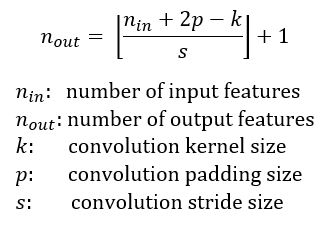

In [ ]:
%%add_to StandardVAE
def get_layer_size(self, layer: int) -> Tuple[int]:
    y_l, x_l = self.input_d
    for i in range(layer - 1):
        y_l = math.ceil((y_l - 2) / 2 + 1)
        x_l = math.ceil((x_l - 2) / 2 + 1)
    return y_l, x_l

### **Make an inference with the network**

    Args:
        x - input image (batch x channels x height x width).


---


    Returns:
        (out, mu, logvar) where:
            out - reconstructed image (batch x channels x height x width).
            mu - mean of sample in latent space.
            logvar - log variance of sample in latent space.

In [ ]:
%%add_to StandardVAE
def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor]:
    mu, logvar = self.encode(x)
    std = torch.exp(logvar / 2)
    eps = torch.randn_like(std)
    z = mu + std * eps
    out = self.decode(z)
    return out, mu, logvar

### **Passing test examples through the entire VAE Network**

    Args:
        data_path - Path to the directory that stores the test images
        weight_file - Path to the .pt file that stores the weights of the VAE Network
---
    Returns:
      (final_input, final_mean, final_var, final_output) where:
        final_input - List of input image
        final_mean - List of mean of latent distribution for each input image
        final_var - List of variance of latent distribution for each input image
        final_output - List of reconstructed images


In [ ]:
%%add_to StandardVAE
def testing(self,
            data_path: str,
            weight_file: str):
    # Using cuda if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print (f'Using device: {device}')
    network = self.to(device)
    network.load_state_dict(torch.load(weight_file)) # Load weights from the .pt file
    network.eval() # Set the network in evalution mode

    # Defining Image Transformations
    # 1. Convert the input image to a PyTorch Tensor
    # 2. Resizing the image to (batch x channels x height x width)
    # (Optional) 3. Incase of only one input channel, we convert the input image to a GrayScale Image
    if self.n_chan == 1:
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize(self.input_d),
            torchvision.transforms.Grayscale()])
    else:
      transforms = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize(self.input_d)])

    # Applying image transformations to the input test dataset
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms)

    # Set up a Python iterable over the input test dataset
    test_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    final_input = []
    final_class = []
    final_output = []
    final_mean = []
    final_var = []
    for data in test_loader:
        input, class_name = data
        final_input.append(input)
        final_class.append(int(class_name))
        input = input.to(device)
        with torch.no_grad():
          output, mean, logvariance = network.forward(input)
          final_mean.append(mean)
          final_var.append(torch.exp(logvariance/2))
          final_output.append(output)
    return (final_input, final_class, final_mean, final_var, final_output)

### **Early Stopping Module**

Checks whether the current model has the best validation accuracy and decides to stop or proceed. If the current score on validation dataset is the best so far, it saves the model weights and bias.

    Args:
        curr_score : Score of the current model
        model : Trained VAE model
        epoch : current epoch

---

    Returns:
        stop_now: Whether or not to stop

In [ ]:
%%add_to StandardVAE
def check(self, curr_score, model, weights_file) :
    if self.best_score==None:
        self.best_score = curr_score
        state_dict = model.state_dict()
        torch.save(state_dict, weights_file)
    else:
        if self.best_score-curr_score>self.delta:
            self.best_score = curr_score
            self.num_bad_epochs = 0
            state_dict = model.state_dict()
            torch.save(state_dict, weights_file)
        else:
            self.num_bad_epochs += 1
    if self.num_bad_epochs==self.patience:
        return True
    else:
        return False

### **Train the Standard VAE network**

    Args:
        data_path - path to training dataset.  This should be a valid torch dataset with different classes for each level of each partition.
        epochs - number of epochs to train the network.
        weights_file - name of file to save trained weights.

In [ ]:
%%add_to StandardVAE
def train_self(self,
                data_path: str,
                val_path: str,
                epochs: int,
                learning_rate: float,
                weights_file: str,
                hyperparameters_file: str) -> None:
    # Using cuda (GPU) if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print (f'Using device: {device}')

    # Set the network in training mode
    network = self.to(device)
    network.train()

    # Defining Image Transformations
    # 1. Convert the input image to a PyTorch Tensor
    # 2. Resizing the image to (batch x channels x height x width)
    # (Optional) 3. Incase of only one input channel, we convert the input image to a GrayScale Image
    if self.n_chan == 1:
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize(self.input_d),
            torchvision.transforms.Grayscale()])
    else:
        transforms = torchvision.transforms.Compose([
          torchvision.transforms.ToTensor(),
          torchvision.transforms.Resize(self.input_d)])

    # Applying image transformations to the input training dataset
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms)

    # Sets up a Python iterable over the input training dataset
    train_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    # Applying image transformations to the input validation dataset
    dataset = torchvision.datasets.ImageFolder(
        root=val_path,
        transform=transforms)

    # Sets up a Python iterable over the input validation dataset
    val_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=self.batch,
        shuffle=True,
        drop_last=True)

    # Save the hyperparameters used for training the VAE Network
    hyperparameters = {}
    hyperparameters["n_latent"] = self.n_latent
    hyperparameters["beta"] = self.beta
    hyperparameters["n_chan"] = self.n_chan
    hyperparameters["input_d"] = self.input_d
    torch.save(hyperparameters, hyperparameters_file)

    # Using Adam Optimizer for training
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        epoch_loss = 0
        for data in train_loader:
            input, class_name = data
            input = input.to(device)

            # Passing the input image through VAE Network
            out, mu, logvar = network.forward(input)

            # KL-Divergence Loss (Regularization loss in VAE Loss function)
            kl_loss = torch.mul(input=torch.sum(mu.pow(2) + logvar.exp() - logvar - 1), other=0.5)

            # Binary Cross Entropy Loss (Reconstruction loss in VAE Loss function)
            # ce_loss = torch.nn.functional.binary_cross_entropy(
            #     input=out,
            #     target=input,
            #     size_average=False)

            # Mean Square Error Loss (Reconstruction loss in VAE Loss function)
            mse_loss = torch.nn.functional.mse_loss(out, input)

            # Total Loss = Regularization Loss + Beta * Reconstruction Loss
            loss = kl_loss + torch.mul(mse_loss, self.beta)

            optimizer.zero_grad() # Sets gradients of all model parameters to zero
            loss.backward() # Perform Back-Propogation
            optimizer.step() # Performs a single optimization step (parameter update)
            epoch_loss += loss

        val_loss = 0
        for data in val_loader:
            input, class_name = data
            input = input.to(device)
            output, mu, logvar = network.forward(input)
            # kl_val_loss = torch.mul(input=torch.sum(mu.pow(2) + logvar.exp() - logvar - 1), other=0.5)
            mse_val_loss = torch.nn.functional.mse_loss(output, input)
            val_loss += mse_val_loss
        if self.check(val_loss, network, weights_file):
            print(f'Early Stopping at epoch {epoch}')
            break
        print(f'Epoch: {epoch}; Training Loss: {epoch_loss}; Validation Loss: {val_loss}')
    print('Training finished, saving weights...')

## **Encoder Portion of ClassBasedVae**

Encoder-only portion of the ClassBasedVae Network. This class is not trainable.

    Args:
        n_latent - size of latent space (encoder output)
        n_chan - number of channels in the input image
        input_d - size of input images (height x width)

In [ ]:
class Encoder(torch.nn.Module):
    def __init__(self,
                 n_latent: int,
                 n_chan: int,
                 input_d: Tuple[int]) -> None:
        super(Encoder, self).__init__()
        # Initializing the class variables
        self.n_latent = n_latent
        self.n_chan = n_chan
        self.input_d = input_d

        # Calculating the size of intermediate output of convolutional layers
        self.y_2, self.x_2 = self.get_layer_size(2)
        self.y_3, self.x_3 = self.get_layer_size(3)
        self.y_4, self.x_4 = self.get_layer_size(4)
        self.y_5, self.x_5 = self.get_layer_size(5)
        self.hidden_units = self.y_5 * self.x_5 * 16 # Number of neurons after convolution layers (height x width x n_chan)

        # Convolutional Encoder network
        self.enc_conv1 = torch.nn.Conv2d(
            in_channels=self.n_chan,
            out_channels=128,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv1_bn = torch.nn.BatchNorm2d(128)
        self.enc_conv1_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv1_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv2 = torch.nn.Conv2d(
            in_channels=128,
            out_channels=64,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv2_bn = torch.nn.BatchNorm2d(64)
        self.enc_conv2_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv2_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        self.enc_conv3 = torch.nn.Conv2d(
            in_channels=64,
            out_channels=32,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv3_bn = torch.nn.BatchNorm2d(32)
        self.enc_conv3_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv3_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True, ceil_mode=True)

        self.enc_conv4 = torch.nn.Conv2d(
            in_channels=32,
            out_channels=16,
            kernel_size=3,
            bias=False,
            padding='same')
        self.enc_conv4_bn = torch.nn.BatchNorm2d(16)
        self.enc_conv4_af = torch.nn.LeakyReLU(0.1)
        self.enc_conv4_pool = torch.nn.MaxPool2d(
            kernel_size=2,
            return_indices=True,
            ceil_mode=True)

        # Dense Encoder Bottleneck
        self.enc_dense1 = torch.nn.Linear(self.hidden_units, 2048)
        self.enc_dense1_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense2 = torch.nn.Linear(2048, 1000)
        self.enc_dense2_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense3 = torch.nn.Linear(1000, 250)
        self.enc_dense3_af = torch.nn.LeakyReLU(0.1)

        # Latent Variables Calculation
        self.enc_dense4_mu_positive = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_mu_positive_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_mu_negative = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_mu_negative_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_var_positive = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_var_positive_af = torch.nn.LeakyReLU(0.1)

        self.enc_dense4_var_negative = torch.nn.Linear(250, self.n_latent)
        self.enc_dense4_var_negative_af = torch.nn.LeakyReLU(0.1)

### **Encode tensor x to its latent representation**

    Args:
        x - batch x channels x height x width tensor.

    Returns:
        (mu, var) where mu is sample mean and var is log variance in latent space.

In [ ]:
%%add_to Encoder
def encode(self, x: torch.Tensor) -> torch.Tensor:
    # Convolutional Encoder Network
    z = x
    z = self.enc_conv1(z)
    z = self.enc_conv1_bn(z)
    z = self.enc_conv1_af(z)
    z, self.indices1 = self.enc_conv1_pool(z)

    z = self.enc_conv2(z)
    z = self.enc_conv2_bn(z)
    z = self.enc_conv2_af(z)
    z, self.indices2 = self.enc_conv2_pool(z)

    z = self.enc_conv3(z)
    z = self.enc_conv3_bn(z)
    z = self.enc_conv3_af(z)
    z, self.indices3 = self.enc_conv3_pool(z)

    z = self.enc_conv4(z)
    z = self.enc_conv4_bn(z)
    z = self.enc_conv4_af(z)
    z, self.indices4 = self.enc_conv4_pool(z)

    # Dense Encoder Bottleneck
    z = z.view(z.size(0), -1) # Converting a 4D tensor (output of convolutional layer) to 1D tensor
    z = self.enc_dense1(z)
    z = self.enc_dense1_af(z)

    z = self.enc_dense2(z)
    z = self.enc_dense2_af(z)

    z = self.enc_dense3(z)
    z = self.enc_dense3_af(z)

    return z

In [ ]:
%%add_to Encoder
def positive_latent_calc(self, z: torch.Tensor) -> Tuple[torch.Tensor]:
    mu = self.enc_dense4_mu_positive(z)
    mu = self.enc_dense4_mu_positive_af(mu)

    var = self.enc_dense4_var_positive(z)
    var = self.enc_dense4_var_positive_af(var)

    return mu, var

In [ ]:
%%add_to Encoder
def negative_latent_calc(self, z: torch.Tensor) -> Tuple[torch.Tensor]:
    mu = self.enc_dense4_mu_negative(z)
    mu = self.enc_dense4_mu_negative_af(mu)

    var = self.enc_dense4_var_negative(z)
    var = self.enc_dense4_var_negative_af(var)

    return mu, var

### **Layer Size Calculation**

Given a network with some input size, calculate the dimensions of the resulting layers.

    Args:
        layer - Layer Number
          For the encoder: 1 -> 2 -> 3 -> 4
          For the decoder: 4 -> 3 -> 2 -> 1

    Returns:
        (y, x) where y is the layer height in pixels and x is the layer width in pixels.

In [ ]:
%%add_to Encoder
def get_layer_size(self, layer: int) -> Tuple[int]:
    y_l, x_l = self.input_d
    for i in range(layer - 1):
        y_l = math.ceil((y_l - 2) / 2 + 1)
        x_l = math.ceil((x_l - 2) / 2 + 1)
    return y_l, x_l

### **Make an inference with the network**

    Args:
        x - input image (batch x channels x height x width).

    Returns:
        (mu, logvar) where mu is mean and logvar is the log varinace of latent space representation of input sample x.

In [ ]:
%%add_to Encoder
def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor]:
    positive_mean, positive_logvar = self.positive_latent_calc(self.encode(x))
    negative_mean, negative_logvar = self.negative_latent_calc(self.encode(x))
    return positive_mean, positive_logvar, negative_mean, negative_logvar

### **Passing test examples through the entire VAE Network**

    Args:
        data_path - Path to the directory that stores the test images
        weight_file - Path to the .pt file that stores the weights of the VAE Network
---
    Returns:
      (final_mean, final_var) where:
        final_mean - List of mean of latent distribution for each input image
        final_var - List of variance of latent distribution for each input image

In [ ]:
%%add_to Encoder
def testing(self,
            data_path: str,
            weight_file: str):
    # Using cuda (GPU) if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print (f'Using device: {device}')
    network = self.to(device)
    network.load_state_dict(torch.load(weight_file))# Load weights from the .pt file
    network.eval() # Set the network in evalution mode

    # Defining Image Transformations
    # 1. Convert the input image to a PyTorch Tensor
    # 2. Resizing the image to (batch x channels x height x width)
    # (Optional) 3. Incase of only one input channel, we convert the input image to a GrayScale Image
    if self.n_chan == 1:
        transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize(self.input_d),
            torchvision.transforms.Grayscale()])
    else:
      transforms = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize(self.input_d)])

    # Applying image transformations to the input test dataset
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms)

    # Set up a Python iterable over the input test dataset
    test_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=1,
        shuffle=True,
        drop_last=True)

    final_input = []
    final_positive_mean = []
    final_negative_mean = []
    final_positive_var = []
    final_negative_var = []
    final_class = []
    for data in test_loader:
        input, class_name = data
        final_input.append(input)
        final_class.append(int(class_name))
        input = input.to(device)
        with torch.no_grad():
          positive_mean, positive_logvariance, negative_mean, negative_logvariance = network.forward(input)
        final_positive_mean.append(positive_mean)
        final_positive_var.append(torch.exp(positive_logvariance/2))
        final_negative_mean.append(negative_mean)
        final_negative_var.append(torch.exp(negative_logvariance/2))
    return (final_input, final_class, final_positive_mean, final_positive_var, final_negative_mean, final_negative_var)

## **Client A Computations**


### **Class-Based VAE**

Set the hyper parameters for training the VAE network at Client A

    Parameters:
        n_latent - Dimension of latent space representation
        alpha - Controls the weightage of Reconstruction Loss in the total loss function of the Class Based VAE
        beta - Controls the weightage of Repulsion Loss in the total loss function of the Class Based VAE
        rho - Controls the distance between the clusters belonging to positive and negative classes in the latent space
        dimensions - The dimensions of the images in training dataset
        dataset - Path to the Labelled Dataset of Client A
        grayscale - Boolean Value indicating whether the input images are grayscale or not
        weights_path - Path to the .pt file where the final weights of the VAE Network will be stored
        hyperparameters_path - Path to the .pt file where the hyperparameters of the VAE Network will be stored
        latent_variables_path - Path to the .pt file where the latent_variables obtained from the VAE Network will be stored

In [ ]:
n_latent = 2
alpha = 1.0
beta = 10.0
gamma = 20.0
rho = 10.0
dimensions = "224x224"
dataset = "/content/Dataset/Client-A/Training"
validation_dataset = "/content/Dataset/Client-A/Validation"
grayscale = 0
weights_path = "/content/class_based_vae_weights.pt"
hyperparameters_path = "/content/class_based_vae_hyperparameters.pt"
latent_variables_path = "/content/latent.pt"

input_dimensions = tuple([int(i) for i in dimensions.split('x')])

#### **Training the VAE Network**

In [ ]:
print(f'Starting training for input size {dimensions}')
print(f'beta={beta}')
print(f'n_latent={n_latent}')
print(f'Using data set {dataset}')

# Creating an instance of VAE Network for training at Client A
ClientA_Network = ClassBasedVae(
    n_latent,
    alpha,
    beta,
    gamma,
    rho,
    n_chan=1 if grayscale else 3,
    input_d=input_dimensions)

# Training the created VAE instance on the labelled dataset at Client A
ClientA_Network.train_self(
    data_path=dataset,
    val_path=validation_dataset,
    epochs=100,
    learning_rate = 1e-5,
    weights_file=weights_path,
    hyperparameters_file = hyperparameters_path)

Starting training for input size 224x224
beta=10.0
n_latent=2
Using data set /content/Dataset/Client-A/Training
Using device: cuda
Epoch: 0; Training Loss: 15339.6591796875; Validation Loss: 0.5861203670501709
Epoch: 1; Training Loss: 6558.6787109375; Validation Loss: 0.4835667908191681
Epoch: 2; Training Loss: 4268.5791015625; Validation Loss: 0.4398801028728485
Epoch: 3; Training Loss: 1565.5048828125; Validation Loss: 0.41357091069221497
Epoch: 4; Training Loss: 974.342529296875; Validation Loss: 0.3828422725200653
Epoch: 5; Training Loss: 653.907470703125; Validation Loss: 0.37378251552581787
Epoch: 6; Training Loss: 498.98980712890625; Validation Loss: 0.35390880703926086
Epoch: 7; Training Loss: 356.5108642578125; Validation Loss: 0.3428979218006134
Epoch: 8; Training Loss: 240.07638549804688; Validation Loss: 0.33174434304237366
Epoch: 9; Training Loss: 171.4647216796875; Validation Loss: 0.3222261071205139
Epoch: 10; Training Loss: 134.3360137939453; Validation Loss: 0.31312677

#### **Obtaining Latent Space Representation (Features) of the Training Examples**

In [ ]:
input_image, class_list, ClientA_true_mean, ClientA_true_variance, ClientA_other_mean, ClientA_other_variance, reconstruction = ClientA_Network.testing(
                                                                  data_path=dataset,
                                                                  weight_file=weights_path
                                                               )
# Save the latent variables (mean and variance) to a .pt file
# latent_variables_dict = {}
# latent_variables_dict["mean"] = mean
# latent_variables_dict["variance"] = variance
# torch.save(latent_variables_dict, latent_variables_path)

# Extracting latent space representation of each image in the training dataset
ClientA_Z = []
for i in range(len(ClientA_other_mean)):
    eps = torch.randn_like(ClientA_other_variance[i])
    mean_cpu = ClientA_other_mean[i].cpu().detach().numpy()
    variance_cpu = ClientA_other_variance[i].cpu().detach().numpy()
    eps = eps.cpu().detach().numpy()
    z = mean_cpu + variance_cpu * eps
    ClientA_Z.append(z)

#### **Visualization of Latent Space at Client A**

This code only works when the dimension of latent space is 2

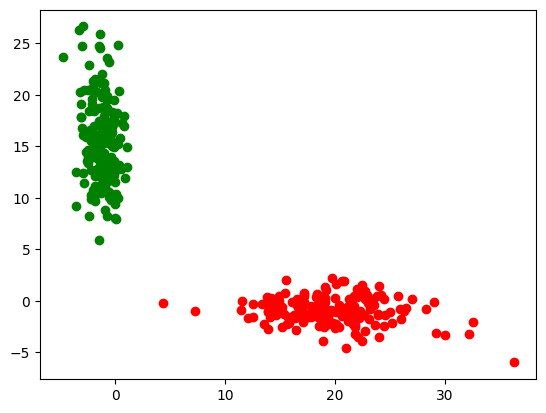

In [ ]:
colors = ['red','green']
for i in range(len(ClientA_Z)):
  z = ClientA_Z[i]
  plt.scatter(z[0][0], z[0][1], c=colors[class_list[i]])
plt.savefig("/content/test.svg", format="svg")

#### **Display Input Images and Reconstructed Images**

In [ ]:
from PIL import Image

# Generate a white image
white_array = torch.ones((3, 224, 2))
white_array.to(torch.int32)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
white_array = white_array.to(device)

for i in range(len(input_image))[:10]:
  # Squeeze the image tensor to 3 dimensions (channels x height x width)
  # In case of GrayScale Images, repeat the same tensor in the 3 channels
  input_image_tensor = torch.squeeze(input_image[i])
  if input_image_tensor.shape[0] == 1:
    input_image_tensor = input_image_tensor.repeat(3, 1, 1)
  reconstruction_image_tensor = torch.squeeze(reconstruction[i])
  if reconstruction_image_tensor.shape[0] == 1:
    reconstruction_image_tensor = reconstruction_image_tensor.repeat(3, 1, 1)

  input_image_tensor = input_image_tensor.to(device)
  reconstruction_image_tensor = reconstruction_image_tensor.to(device)

  # Concatenate the input image and the reconstructed image
  concatenate_image = torch.cat([input_image_tensor, white_array, reconstruction_image_tensor], 2)
  image = torchvision.transforms.ToPILImage()(concatenate_image)
  image = image.resize((384,128), Image.LANCZOS)
  image.show()
  print()

### **Standard VAE**

Set the hyper parameters for training the VAE network at Client A

    Parameters:
        standard_vae_n_latent - Dimension of latent space representation
        standard_vae_beta - Controls the weightage of Reconstruction Loss in the total loss function of the Standard VAE
        standard_vae_dimensions - The dimensions of the images in training dataset
        standard_vae_dataset - Path to the Labelled Dataset of Client A
        standard_vae_grayscale - Boolean Value indicating whether the input images are grayscale or not
        standard_vae_weights_path - Path to the .pt file where the final weights of the VAE Network will be stored
        standard_vae_hyperparameters_path - Path to the .pt file where the hyperparameters of the VAE Network will be stored
        standard_vae_latent_variables_path - Path to the .pt file where the latent_variables obtained from the VAE Network will be stored

In [ ]:
standard_vae_n_latent = 2
standard_vae_beta = 10.0
standard_vae_dimensions = "224x224"
standard_vae_dataset = "/content/Dataset/Client-A/Training"
standard_vae_validation_dataset = "/content/Dataset/Client-A/Validation"
standard_vae_grayscale = 0
standard_vae_weights_path = "/content/standard_vae_weights.pt"
standard_vae_hyperparameters_path = "/content/standard_vae_hyperparameters.pt"
standard_vae_latent_variables_path = "/content/standard_vae_latent.pt"

standard_vae_input_dimensions = tuple([int(i) for i in standard_vae_dimensions.split('x')])

#### **Training the VAE Network**

In [ ]:
# Creating an instance of VAE Network for training at Client A
ClientA_Standard_VAE_Network = StandardVAE(
    standard_vae_n_latent,
    standard_vae_beta,
    n_chan=1 if standard_vae_grayscale else 3,
    input_d=standard_vae_input_dimensions)

# Training the created VAE instance on the labelled dataset at Client A
ClientA_Standard_VAE_Network.train_self(
    data_path=standard_vae_dataset,
    val_path=standard_vae_validation_dataset,
    epochs=100,
    learning_rate = 1e-4,
    weights_file=standard_vae_weights_path,
    hyperparameters_file = standard_vae_hyperparameters_path)

Using device: cuda
Epoch: 0; Training Loss: 200.41831970214844; Validation Loss: 0.7974317669868469
Epoch: 1; Training Loss: 175.12521362304688; Validation Loss: 0.7573106288909912
Epoch: 2; Training Loss: 168.45033264160156; Validation Loss: 0.7296028137207031
Epoch: 3; Training Loss: 163.17904663085938; Validation Loss: 0.7064984440803528
Epoch: 4; Training Loss: 158.4361114501953; Validation Loss: 0.6851094961166382
Epoch: 5; Training Loss: 154.0979461669922; Validation Loss: 0.6650665998458862
Epoch: 6; Training Loss: 150.0196075439453; Validation Loss: 0.6464693546295166
Epoch: 7; Training Loss: 146.060546875; Validation Loss: 0.6276501417160034
Epoch: 8; Training Loss: 142.20623779296875; Validation Loss: 0.6086527109146118
Epoch: 9; Training Loss: 138.53591918945312; Validation Loss: 0.5917803645133972
Epoch: 10; Training Loss: 134.9797821044922; Validation Loss: 0.5740913152694702
Epoch: 11; Training Loss: 131.38478088378906; Validation Loss: 0.5587990283966064
Epoch: 12; Train

#### **Obtaining Latent Space Representation (Features) of the Training Examples**

In [ ]:
standard_vae_input_image, standard_vae_class_list, ClientA_mean, ClientA_variance, standard_vae_reconstruction = ClientA_Standard_VAE_Network.testing(
                                                                            data_path=standard_vae_dataset,
                                                                            weight_file=standard_vae_weights_path
                                                                          )

# Extracting latent space representation of each image in the training dataset
Standard_VAE_ClientA_Z = []
for i in range(len(ClientA_mean)):
    eps = torch.randn_like(ClientA_variance[i])
    mean_cpu = ClientA_mean[i].cpu().detach().numpy()
    variance_cpu = ClientA_variance[i].cpu().detach().numpy()
    eps = eps.cpu().detach().numpy()
    z = mean_cpu + variance_cpu * eps
    Standard_VAE_ClientA_Z.append(z)

Using device: cuda


#### **Visualization of Latent Space of Standard VAE at Client A**

This code only works when the dimension of latent space is 2

In [ ]:
colors = ['red','green']
for i in range(len(Standard_VAE_ClientA_Z)):
  z = Standard_VAE_ClientA_Z[i]
  plt.scatter(z[0][0], z[0][1], c=colors[standard_vae_class_list[i]])

#### **Display Input Images and Reconstructed Images**

In [ ]:
from PIL import Image

# Generate a white image
white_array = torch.ones((3, 224, 2))
white_array.to(torch.int32)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
white_array = white_array.to(device)

for i in range(len(standard_vae_input_image))[:10]:
  # Squeeze the image tensor to 3 dimensions (channels x height x width)
  # In case of GrayScale Images, repeat the same tensor in the 3 channels
  standard_vae_input_image_tensor = torch.squeeze(standard_vae_input_image[i])
  if standard_vae_input_image_tensor.shape[0] == 1:
    standard_vae_input_image_tensor = standard_vae_input_image_tensor.repeat(3, 1, 1)
  standard_vae_reconstruction_image_tensor = torch.squeeze(standard_vae_reconstruction[i])
  if standard_vae_reconstruction_image_tensor.shape[0] == 1:
    standard_vae_reconstruction_image_tensor = standard_vae_reconstruction_image_tensor.repeat(3, 1, 1)

  standard_vae_input_image_tensor = standard_vae_input_image_tensor.to(device)
  standard_vae_reconstruction_image_tensor = standard_vae_reconstruction_image_tensor.to(device)

  # Concatenate the input image and the reconstructed image
  concatenate_image = torch.cat([standard_vae_input_image_tensor, white_array, standard_vae_reconstruction_image_tensor], 2)
  image = torchvision.transforms.ToPILImage()(concatenate_image)
  image = image.resize((384,128), Image.LANCZOS)
  image.show()
  print()

## **Approach 1: Sending the Encoder Network + Latent Space Representation to Client B**

    Parameters:
        encoder_weights_path - Path to the .pt file where the weights of encoder portion of the VAE Network will be stored
        test_dataset - Path to the Unlabelled Dataset of Client B

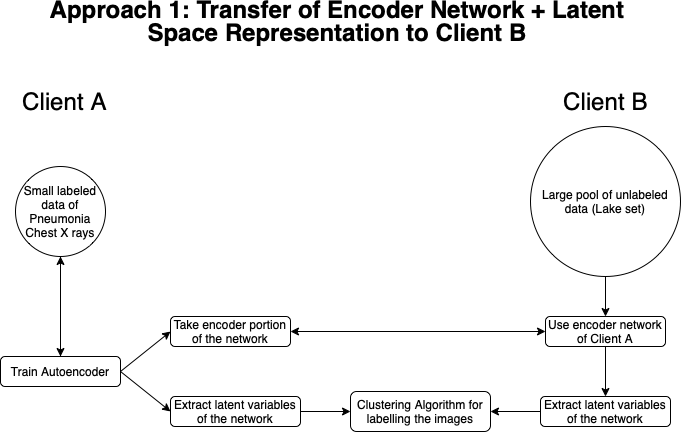

In [ ]:
encoder_weights_path = "/content/enc_only_weights.pt"
test_dataset = "/content/Dataset/Client-B/Training"

### **Extracting Weights of Encoder Network**

In [ ]:
print(f'Converting model {weights_path} to encoder-only version...\n')
full_model = torch.load(weights_path) # Load the weights stored in the .pt file
hyperparameters = torch.load(hyperparameters_path)

# Creating an instance of Encoder-only Network
encoder = Encoder(
    n_latent=hyperparameters["n_latent"],
    n_chan=hyperparameters["n_chan"],
    input_d=hyperparameters["input_d"])

# Extracting the encoder only portion of the VAE Network
encoder_dict = encoder.state_dict()
for key in encoder_dict:
    encoder_dict[key] = full_model[key]

# Saving the weights of the Encoder network in another .pt file
torch.save(encoder_dict, encoder_weights_path)
print("Conversion to Encoder-only Network complete")

Converting model /content/class_based_vae_weights.pt to encoder-only version...

Conversion to Encoder-only Network complete


### **Running the Encoder on the unlabelled dataset of Client B**

In [ ]:
print(f'Starting feature extraction for input size {dimensions}')
print(f'n_latent={n_latent}')
print(f'Using data set {test_dataset}')

(ClientB_input, ClientB_class, ClientB_positive_mean, ClientB_positive_variance, ClientB_negative_mean, ClientB_negative_variance) = encoder.testing(test_dataset, encoder_weights_path)

ClientB_Z = []
for i in range(len(ClientB_negative_mean)):
    eps = torch.randn_like(ClientB_negative_variance[i])
    mean_cpu = ClientB_negative_mean[i].cpu().detach().numpy()
    variance_cpu = ClientB_negative_variance[i].cpu().detach().numpy()
    eps = eps.cpu().detach().numpy()
    z = mean_cpu + variance_cpu * eps
    ClientB_Z.append(z)
print("Feature extraction complete")

Starting feature extraction for input size 224x224
n_latent=2
Using data set /content/Dataset/Client-B/Training
Using device: cuda
Feature extraction complete


In [ ]:
ClientB_Z_negative = []
ClientB_Z_positive = []
for i in range(len(ClientB_input)):
  if ClientB_class[i] == 0:
    eps_negative = torch.randn_like(ClientB_negative_variance[i])
    mean_negative_cpu = ClientB_negative_mean[i].cpu().detach().numpy()
    variance_negative_cpu = ClientB_negative_variance[i].cpu().detach().numpy()
    eps_negative = eps_negative.cpu().detach().numpy()
    z_negative = mean_negative_cpu + variance_negative_cpu * eps_negative
    ClientB_Z_negative.append(z_negative)

    eps_positive = torch.randn_like(ClientB_positive_variance[i])
    mean_positive_cpu = ClientB_positive_mean[i].cpu().detach().numpy()
    variance_positive_cpu = ClientB_positive_variance[i].cpu().detach().numpy()
    eps_positive = eps_positive.cpu().detach().numpy()
    z_positive = mean_positive_cpu + variance_positive_cpu * eps_positive
    ClientB_Z_positive.append(z_positive)
print("Feature extraction complete")

Feature extraction complete


In [ ]:
for i in range(len(ClientB_Z_positive)):
  z = ClientB_Z_positive[i]
  plt.scatter(z[0][0], z[0][1], c='green')

for i in range(len(ClientB_Z_negative)):
  z = ClientB_Z_negative[i]
  plt.scatter(z[0][0], z[0][1], c='red')

### **Visualization of Latent Space at Client B**

This code works only when dimension of latent space is 2

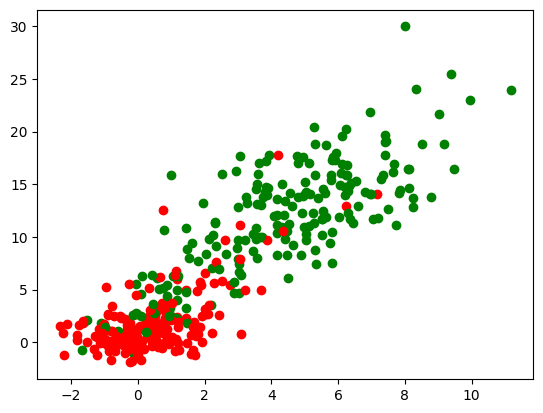

In [ ]:
colors = ['red','green']
for i in range(len(ClientB_Z)):
    z = ClientB_Z[i]
    plt.scatter(z[0][0], z[0][1], c=colors[ClientB_class[i]])

### **Converting the Latent Space Representations to NumPy Arrays**

In [ ]:
ClientA_Z_tensor = torch.squeeze(torch.tensor(ClientA_Z))
ClientA_Z_numpy = ClientA_Z_tensor.cpu().detach().numpy()

<ipython-input-35-042ab440cd83>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  ClientA_Z_tensor = torch.squeeze(torch.tensor(ClientA_Z))


In [ ]:
ClientB_Z_tensor = torch.squeeze(torch.tensor(ClientB_Z))
ClientB_Z_numpy = ClientB_Z_tensor.cpu().detach().numpy()

### **K-Means Clustering**

#### **Fitting a K-Means Clustering Model on the Latent Space Representations of Client A**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(ClientA_Z_numpy)

#### **Predicting the Labels of Test Dataset Images**

In [ ]:
result = kmeans.predict(ClientB_Z_numpy)

actual_negative_instances = ClientB_class.count(0)
actual_positive_instances = ClientB_class.count(1)

negative_predictions = list(np.where(result == 0)[0])
positive_predictions = list(np.where(result == 1)[0])

total_positive_prediction = len(positive_predictions)
total_negative_prediction = len(negative_predictions)

true_positive_class = [ClientB_class[int(i)] for i in positive_predictions]
true_negative_class = [ClientB_class[int(i)] for i in negative_predictions]

predicted_negative_instances = true_negative_class.count(0)
predicted_positive_instances = true_positive_class.count(1)

# for i in res_list:
#   input_image = torchvision.transforms.ToPILImage()(torch.squeeze(ClientB_input[int(i)]))
#   input_image.show()
#   print()

print(f"Number of images belonging to positive class in the test dataset is {actual_positive_instances}")
print(f"Number of predictions belonging to positive class is {total_positive_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the positive class is {predicted_positive_instances}")
print()
print(f"Number of images belonging to negative class in the test dataset is {actual_negative_instances}")
print(f"Number of predictions belonging to negative class is {total_negative_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the negative class is {predicted_negative_instances}")

### **SVM Classification**

#### **Fitting a Support Vector Classifier on the Latent Space Representations of Client A**

In [ ]:
from sklearn.svm import SVC

classifier = SVC(gamma='auto', kernel='poly')
classifier.fit(ClientA_Z_numpy, class_list)

SVC(gamma='auto', kernel='poly')

#### **Predicting the Labels of the Test Dataset Images**

In [ ]:
result = classifier.predict(ClientB_Z_numpy)

actual_negative_instances = ClientB_class.count(0)
actual_positive_instances = ClientB_class.count(1)

negative_predictions = list(np.where(result == 0)[0])
positive_predictions = list(np.where(result == 1)[0])

total_positive_prediction = len(positive_predictions)
total_negative_prediction = len(negative_predictions)

true_positive_class = [ClientB_class[int(i)] for i in positive_predictions]
true_negative_class = [ClientB_class[int(i)] for i in negative_predictions]

predicted_negative_instances = true_negative_class.count(0)
predicted_positive_instances = true_positive_class.count(1)

print(f"Number of images belonging to positive class in the test dataset is {actual_positive_instances}")
print(f"Number of predictions belonging to positive class is {total_positive_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the positive class is {predicted_positive_instances}")
print()
print(f"Number of images belonging to negative class in the test dataset is {actual_negative_instances}")
print(f"Number of predictions belonging to negative class is {total_negative_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the negative class is {predicted_negative_instances}")

Number of images belonging to positive class in the test dataset is 155
Number of predictions belonging to positive class is 195
Out of all the predictions made by the model, number of predictions that are correct for the positive class is 122

Number of images belonging to negative class in the test dataset is 200
Number of predictions belonging to negative class is 160
Out of all the predictions made by the model, number of predictions that are correct for the negative class is 127


### **Fuzzy C-Means Clustering**

#### **Installing Python Package to perform Fuzzy C-Means Clustering**

In [ ]:
!pip install fuzzy-c-means

#### **Fitting a Fuzzy C-Means Model on the Latent Space Representations of Client A**

In [ ]:
from fcmeans import FCM

fcm = FCM(n_clusters=2)
fcm.fit(ClientA_Z_numpy)

#### **Predicting the Labels of Test Dataset Images**

In [ ]:
result = fcm.soft_predict(ClientB_Z_numpy)

actual_positive_instances = ClientB_class.count(1)
actual_negative_instances = ClientB_class.count(0)

positive_predictions = list(np.where(result[:,1] > 0.7)[0])
negative_predictions = list(np.where(result[:,0] > 0.7)[0])

total_positive_prediction = len(positive_predictions)
total_negative_prediction = len(negative_predictions)

true_positive_class = [ClientB_class[int(i)] for i in positive_predictions]
true_negative_class = [ClientB_class[int(i)] for i in negative_predictions]

predicted_positive_instances = true_positive_class.count(1)
predicted_negative_instances = true_negative_class.count(0)

print(f"Number of images belonging to positive class in the test dataset is {actual_positive_instances}")
print(f"Number of predictions belonging to positive class is {total_positive_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the positive class is {predicted_positive_instances}")
print()
print(f"Number of images belonging to negative class in the test dataset is {actual_negative_instances}")
print(f"Number of predictions belonging to negative class is {total_negative_prediction}")
print(f"Out of all the predictions made by the model, number of predictions that are correct for the negative class is {predicted_negative_instances}")

Number of images belonging to positive class in the test dataset is 1236
Number of predictions belonging to positive class is 263
Out of all the predictions made by the model, number of predictions that are correct is 250


## **Approach 2 : Sending the entire VAE Network + Latent Space Representation to Client B**

    Parameters:
        test_dataset - Path to the Unlabelled Dataset of Client B

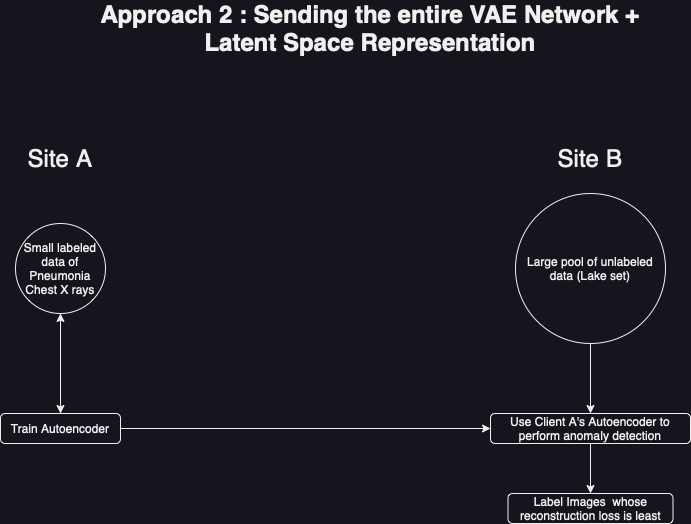

In [ ]:
test_dataset = "/content/Dataset/Client-B/Training"

### **Loading Hyperparameters of VAE Network trained at Client A**



In [ ]:
hyperparameters = torch.load(standard_vae_hyperparameters_path)
n_latent = hyperparameters["n_latent"]
# alpha = hyperparameters["alpha"]
beta = hyperparameters["beta"]
# rho = hyperparameters["rho"]
n_chan = hyperparameters["n_chan"]
input_d = hyperparameters["input_d"]

### **Passing the dataset at Client B through the VAE Network trained at Client A**

In [ ]:
# Creating an instance of VAE Network for training at Client B
ClientB_Network = StandardVAE(n_latent, beta, n_chan, input_d)

# Passing the dataset at Client B through the VAE Network trained at Client A
input_image, class_list, ClientB_mean, ClientB_variance, reconstruction = ClientB_Network.testing(
                                                                  data_path = test_dataset,
                                                                  weight_file = standard_vae_weights_path
                                                               )

Using device: cuda


### **Display Input Image and Reconstructed Image**

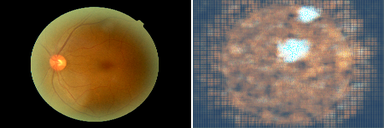

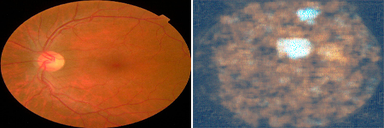

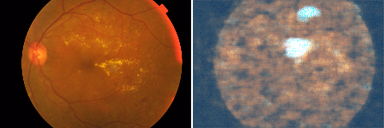

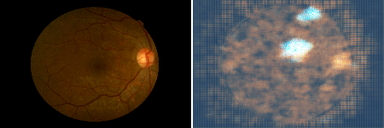

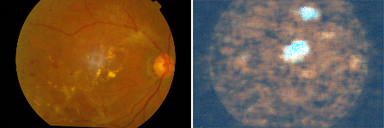

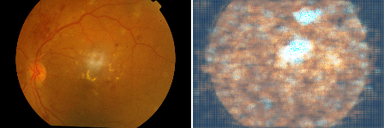

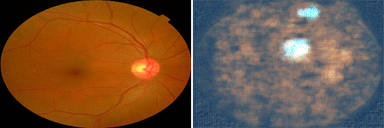

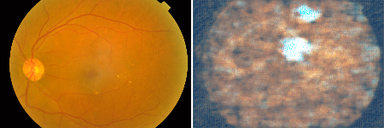

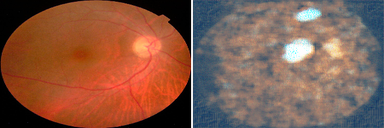

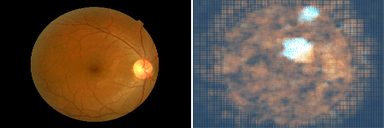

In [ ]:
from PIL import Image

# Generate a white image
white_array = torch.ones((3, 224, 2))
white_array.to(torch.int32)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
white_array = white_array.to(device)

for i in range(len(input_image))[:10]:
  # Squeeze the image tensor to 3 dimensions (channels x height x width)
  # In case of GrayScale Images, repeat the same tensor in the 3 channels
  input_image_tensor = torch.squeeze(input_image[i])
  if input_image_tensor.shape[0] == 1:
    input_image_tensor = input_image_tensor.repeat(3, 1, 1)
  reconstruction_image_tensor = torch.squeeze(reconstruction[i])
  if reconstruction_image_tensor.shape[0] == 1:
    reconstruction_image_tensor = reconstruction_image_tensor.repeat(3, 1, 1)

  input_image_tensor = input_image_tensor.to(device)
  reconstruction_image_tensor = reconstruction_image_tensor.to(device)

  # Concatenate the input image and the reconstructed image
  concatenate_image = torch.cat([input_image_tensor, white_array, reconstruction_image_tensor], 2)
  image = torchvision.transforms.ToPILImage()(concatenate_image)
  image = image.resize((384,128), Image.LANCZOS)
  image.show()
  print()

### **Computing Reconstruction Loss for each test image**

In [ ]:
input_image_tensor = torch.squeeze(torch.stack(input_image))
reconstruction_tensor = torch.squeeze(torch.stack(reconstruction))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
input_image_tensor = input_image_tensor.to(device)
reconstruction_tensor = reconstruction_tensor.to(device)
mse_loss = torch.mean(torch.square(reconstruction_tensor-input_image_tensor), (1,2,3))

### **Calculating the top 100 predictions**

In [ ]:
# Sorting the images of unlabelled dataset in increasing order of Reconstruction loss
# sort_index = torch.argsort(mse_loss)
# top_100_predictions = sort_index[:100]

positive_predictions = [i for i,v in enumerate(mse_loss) if v < 0.05]
negative_predictions = [i for i,v in enumerate(mse_loss) if v >= 0.05]
actual_class_positive_predictions = [class_list[i] for i in positive_predictions]
actual_class_negative_predictions = [class_list[i] for i in negative_predictions]
correct_positive_predictions = actual_class_positive_predictions.count(1)
correct_negative_predictions = actual_class_negative_predictions.count(0)
false_positive_predictions = actual_class_positive_predictions.count(0)
false_negative_predictions = actual_class_negative_predictions.count(1)

# Displaying the top 100 images with least Reconstruction loss
# for i in sort_index[:10]:
#   image = torchvision.transforms.ToPILImage()(torch.squeeze(input_image[int(i)]))
#   image.show()
#   print()

print(f"True Negative is {correct_negative_predictions}")
print(f"True Positive is {correct_positive_predictions}")
print(f"False Positive is {false_positive_predictions}")
print(f"False Negative is {false_negative_predictions}")
print(f"Accuracy of the Model is {correct_positive_predictions/len(positive_predictions)*100} %")

True Negative is 14
True Positive is 1657
False Positive is 1591
False Negative is 0
Accuracy of the Model is 51.01600985221675 %


In [ ]:
os.chdir("/content")
torch.cuda.empty_cache()

In [ ]:
!rm -rf /content/Dataset
!rm -rf /content/standard_vae_hyperparameters.pt
!rm -rf /content/standard_vae_weights.pt

## **Approach 3 : Train a separate VAE Network at Client B**

    Parameters:
        test_dataset - Path to the Unlabelled Dataset of Client B
        ClientB_weights_path - Path to the .pt file where the weights of the VAE Network trained at Client B will be stored
        ClientB_hyperparameters_path - Path to the .pt file where the hyperparameters of the VAE Network trained at Client B will be stored

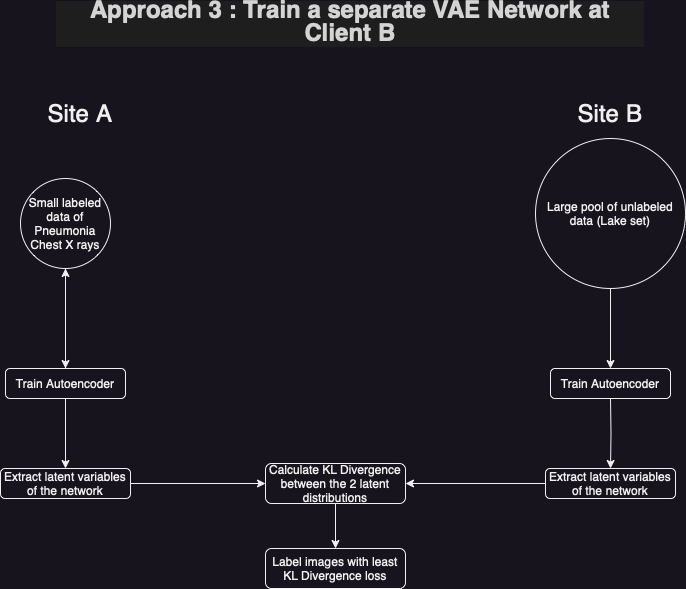

In [ ]:
test_dataset = "/content/MNIST-Dataset/Client-B/Training"
validation_dataset = "/content/MNIST-Dataset/Client-B/Validation"
ClientB_weights_path = "/content/ClientB_weights.pt"
ClientB_hyperparameters_path = "/content/ClientB_hyperparameters.pt"

### **Loading Hyperparameters of VAE Network trained at Client A**

In [ ]:
hyperparameters = torch.load(hyperparameters_path)
n_latent = hyperparameters["n_latent"]
beta = hyperparameters["beta"]
n_chan = hyperparameters["n_chan"]
input_d = hyperparameters["input_d"]

### **Training the VAE Network at Client B**

In [ ]:
# Creating an instance of VAE Network for training at Client B
ClientB_Network = BetaVae(n_latent, beta, n_chan, input_d)

# Training the created VAE instance on the unlabelled dataset at Client B
ClientB_Network.train_self(
    data_path=test_dataset,
    val_path=validation_dataset,
    epochs=100,
    learning_rate = 1e-5,
    weights_file = ClientB_weights_path,
    hyperparameters_file = ClientB_hyperparameters_path)

Using device: cuda
Epoch: 0; Training Loss: 197.40899658203125; Validation Loss: 16.451560974121094
Epoch: 1; Training Loss: 157.63682556152344; Validation Loss: 14.944804191589355
Epoch: 2; Training Loss: 146.87477111816406; Validation Loss: 14.194295883178711
Epoch: 3; Training Loss: 140.4997100830078; Validation Loss: 13.672910690307617
Epoch: 4; Training Loss: 135.72366333007812; Validation Loss: 13.27785587310791
Epoch: 5; Training Loss: 131.8470916748047; Validation Loss: 12.923892974853516
Epoch: 6; Training Loss: 128.5607452392578; Validation Loss: 12.608291625976562
Epoch: 7; Training Loss: 125.54676818847656; Validation Loss: 12.313429832458496
Epoch: 8; Training Loss: 122.73639678955078; Validation Loss: 12.043416023254395
Epoch: 9; Training Loss: 120.1319351196289; Validation Loss: 11.788641929626465
Epoch: 10; Training Loss: 117.70159149169922; Validation Loss: 11.55738353729248
Epoch: 11; Training Loss: 115.35852813720703; Validation Loss: 11.330028533935547
Epoch: 12; Tr

### **Passing the dataset at Client B through the trained VAE Network**

In [ ]:
input_image, ClientB_mean, ClientB_variance, reconstruction = ClientB_Network.testing(
                                                                  data_path=test_dataset,
                                                                  weight_file=ClientB_weights_path
                                                               )

Using device: cuda


### **Display Input Image and Reconstructed Image**

In [ ]:
from PIL import Image

# Generate a white image
white_array = torch.ones((3, 28, 2))
white_array.to(torch.int32)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
white_array = white_array.to(device)

for i in range(len(input_image)):
  # Squeeze the image tensor to 3 dimensions (channels x height x width)
  # In case of GrayScale Images, repeat the same tensor in the 3 channels
  input_image_tensor = torch.squeeze(input_image[i], 1)
  if input_image_tensor.shape[0] == 1:
    input_image_tensor = input_image_tensor.repeat(3, 1, 1)
  reconstruction_image_tensor = torch.squeeze(reconstruction[i], 1)
  if reconstruction_image_tensor.shape[0] == 1:
    reconstruction_image_tensor = reconstruction_image_tensor.repeat(3, 1, 1)

  # Concatenate the input image and the reconstructed image
  concatenate_image = torch.cat([input_image_tensor, white_array, reconstruction_image_tensor], 2)
  image = torchvision.transforms.ToPILImage()(concatenate_image)
  image = image.resize((384,128), Image.LANCZOS)
  image.show()
  print()

### **KL Divergence between two univariate gaussians**

$\text{KL}(p, q) = \log \frac{\sigma_2}{\sigma_1} + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2 \sigma_2^2} - \frac{1}{2}$

In [ ]:
# Loading Latent Variables of Client A
ClientA_latent = torch.load(latent_variables_path)
ClientA_mean = ClientA_latent["mean"]
ClientA_variance = ClientA_latent["variance"]

In [ ]:
# Converting Latent Space Representations into Tensors
ClientA_mean_tensor = torch.squeeze(torch.stack(ClientA_mean))
ClientB_mean_tensor = torch.squeeze(torch.stack(ClientB_mean))
ClientA_variance_tensor = torch.squeeze(torch.stack(ClientA_variance))
ClientB_variance_tensor = torch.squeeze(torch.stack(ClientB_variance))

In [ ]:
# Calculating the first term of KL Divergence formula specified above
fraction = ClientB_variance_tensor[None, :] / ClientA_variance_tensor[:, None]
first_term = torch.log(fraction)
first_term = torch.permute(first_term, (1, 0, 2))

# sigma_1^2
numerator = torch.square(ClientA_variance_tensor.unsqueeze(0).repeat(ClientB_mean_tensor.shape[0], 1, 1))
# (mean_1-mean_2)^2
difference = ClientA_mean_tensor[None, :] - ClientB_mean_tensor[:, None]
numerator += torch.square(difference)
# 2*sigma_2^2
denominator = 2*torch.square(ClientB_variance_tensor.unsqueeze(1).repeat(1, ClientA_mean_tensor.shape[0], 1))
# Calculating the second term of KL Divergence formula specified above
second_term = torch.div(numerator, denominator)

# Putting all terms together to get the KL Divergence
kl_divergence = first_term + second_term - 0.5
sum = torch.sum(torch.sum(kl_divergence, 1),1)

### **Displaying the top images with least KL Divergence loss**

In [ ]:
# Sorting the images of unlabelled dataset in increasing order of KL Divergence loss
sort_index = torch.argsort(sum)

# Displaying the top images with least KL Divergence loss
for i in sort_index[:100]:
  input_image = torchvision.transforms.ToPILImage()(torch.squeeze(ClientB_input[i], 1))
  # input_image = input_image.resize((256,256), Image.LANCZOS)
  input_image.show()

## **Analysis**

### **Data Transfer Details**

In [ ]:
encoder_only_weights_size = os.path.getsize('/content/enc_only_weights.pt')
hyperparameters_size = os.path.getsize('/content/hyperparameters.pt')
latent_size = os.path.getsize('/content/latent.pt')
weights_size = os.path.getsize('/content/weights.pt')
print(encoder_only_weights_size, hyperparameters_size, latent_size, weights_size)

10156419 511 559543 20301215
